# EDA Sara Gil

## Exploratory Data Analysis

<div style = "text-align: justify;"> 
En este análisis exploratorio de datos(Exploratory Data Analysis: EDA) la siguiente hipótesis se presenta: parece que en los últimos años viajar a los países asiáticos se ha puesto de moda, no solo por una cultura y naturaleza exóticas, sino porque es mucho más asequible viajar allí por más tiempo que en Europa. En Europa los vuelos son más barato, pero el resto de gastos es cada vez más caro, y cada día que estás se nota mucho en el bolsillo. Por esto mismo y por otras variables, como trabajar de freelance, parece que la tendencia es que en los últimos años la gente prefiere viajar al sudeste asiático que a Europa.
En resumidas cuentas la hipótesis es:
** DESDE HACE ALGUNOS AÑOS, SE PREFIERE VIAJAR AL SUDESTE ASIÁTICO QUE A EUROPA**

Para ello, he cogido un archivo excel de UN Tourism, más concretamente sobre el 'inbound tourism', los turistas que llegan. 
Dado que los datos estaban en formato excel, cambié el formato a csv, y solo cogí la hoja de los datos, puesto que había otra hoja explicativa, la cual la guardé en otro excel. 
 </div>

In [2]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Markdown, display

# Configuración para gráficos
plt.style.use('default')
sns.set_palette('husl')

## :📊 1. Carga de Datos

Importamos el archivo Excel con los datos de pasajeros internacionales:

In [3]:
#La tabla de datos fue descargada en este enlace: https://www.untourism.int/tourism-statistics/tourism-data-inbound-tourism
Inbound_tourism_by_region = pd.read_csv('/Users/SaraGil/Desktop/Bootcamp - The Bridge/Copia alumna/Ejercicios/2-Analytics/EDA/EDA Sara Gil/src/data/UN_Tourism_inbound_arrivals_by_region_10_2025.csv', sep= ';')

## 🧹 2. DATA CLEANING
Vamos a analizar y organizar los datos que aparecen en la tabla.

Incluyo aquí el overview que ofrecía el documento de Excel para entender qué datos ofrece cada columna (en inglés):

File content:  

Content	  

 All Countries: Inbound Tourism: Arrivals by region 1995 - 2024 (10.2025). UN Tourism Statistics Database, Madrid. Data updated on 15 October 2025. More information: https://www.untourism.int/tourism-statistics/tourism-data-inbound-tourism
            
Data variables:	  

Variable Description:	  

indicator_code:	Code that identifies the indicator.	  

indicator_label: Description of the indicator.	  

indicator_previous_code: Indicator code used in the previous versions of the database (e.g. in the former publications "Compendium" [CP] and "Yearbook " [YB]).		  

reporter_area_code: Code that identifies the geographic area represented by the statistical focal point that reported the data.	  

reporter_area_label: Name of the reporter area as per the United Nations standard for statistical use (M49).		  

partner_area_code: Code that identifies the geographical area other than the reporter area that participates in the phenomenon described by the indicator (i.e. area of origin for inbound flows and area of destination for outbound flows).	  

partner_area_label:	Name of the partner area as per the United Nations standard for statistical use (M49).	  

year: Year represented by the value of the indicator.	  

value:	Value of the indicator.	  

flag:	Code providing information about the quality of a value or about unusual or missing values, as per SDMX code list for observation status (https://sdmx.org/sdmx_cdcl/).	  

flag_label	Description of the flag code.		  

unit: Unit of measurement that defines the scale or type of the value.		
notes: Additional comments (if any)	  


In [4]:
# Explorar la estructura de los datos
print("Información del dataset:")
print("=" * 50)
Inbound_tourism_by_region.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33596 entries, 0 to 33595
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   indicator_code           33596 non-null  object 
 1   indicator_label          33596 non-null  object 
 2   indicator_previous_code  33596 non-null  object 
 3   reporter_area_code       33596 non-null  int64  
 4   reporter_area_label      33596 non-null  object 
 5   partner_area_code        33596 non-null  int64  
 6   partner_area_label       33596 non-null  object 
 7   year                     33596 non-null  int64  
 8   value                    33596 non-null  object 
 9   flag                     101 non-null    object 
 10  flag_label               101 non-null    object 
 11  unit                     33596 non-null  object 
 12  notes                    255 non-null    object 
 13  drop                     0 non-null      float64
dt

In [6]:
#Vemos las dimensiones del dataset, los nombres de las columnas, y los valores únicos por columna.
print("\n\nDIMENSIONES DEL DATASET:")
print("=" * 50)
print(f"Filas: {Inbound_tourism_by_region.shape[0]}")
print(f"Columnas: {Inbound_tourism_by_region.shape[1]}")

print("\n\nPRIMERAS 5 FILAS:")
print("=" * 50)
display(Inbound_tourism_by_region.head())

print("\n\nNOMBRES DE LAS COLUMNAS:")
print("=" * 50)
for i, col in enumerate(Inbound_tourism_by_region.columns):
    print(f"{i+1}. {col}")





DIMENSIONES DEL DATASET:
Filas: 33596
Columnas: 14


PRIMERAS 5 FILAS:


,indicator_code,indicator_label,indicator_previous_code,reporter_area_code,reporter_area_label,partner_area_code,partner_area_label,year,value,flag,flag_label,unit,notes,drop
0,INBD_TRIP_AREA_TOUR_ABRD,inbound - trips - by area of residence - overn...,CP_1_13,12,Algeria,999,World,1995,422,NaN,NaN,thousand trips,NaN,NaN
1,INBD_TRIP_AREA_TOUR_ABRD,inbound - trips - by area of residence - overn...,CP_1_13,12,Algeria,999,World,1996,511,NaN,NaN,thousand trips,NaN,NaN
2,INBD_TRIP_AREA_TOUR_ABRD,inbound - trips - by area of residence - overn...,CP_1_13,12,Algeria,999,World,1997,540,NaN,NaN,thousand trips,NaN,NaN
3,INBD_TRIP_AREA_TOUR_ABRD,inbound - trips - by area of residence - overn...,CP_1_13,12,Algeria,999,World,1998,571,NaN,NaN,thousand trips,NaN,NaN
4,INBD_TRIP_AREA_TOUR_ABRD,inbound - trips - by area of residence - overn...,CP_1_13,12,Algeria,999,World,1999,608,NaN,NaN,thousand trips,NaN,NaN




NOMBRES DE LAS COLUMNAS:
1. indicator_code
2. indicator_label
3. indicator_previous_code
4. reporter_area_code
5. reporter_area_label
6. partner_area_code
7. partner_area_label
8. year
9. value
10. flag
11. flag_label
12. unit
13. notes
14. drop


In [7]:
#Ahora vemos los valores únicos por columna.
print("\n\nVALORES ÚNICOS POR COLUMNA (primeros 10):")
print("=" * 50)
for col in Inbound_tourism_by_region.columns:
    unique_vals = Inbound_tourism_by_region[col].unique()
    print(f"\n{col}:")
    print(f"  - Valores únicos: {len(unique_vals)}")
    print(f"  - Muestra de valores: {list(unique_vals[:10])}")




VALORES ÚNICOS POR COLUMNA (primeros 10):

indicator_code:
  - Valores únicos: 3
  - Muestra de valores: ['INBD_TRIP_AREA_TOUR_ABRD', 'INBD_TRIP_AREA_TOTL_TOUR', 'INBD_TRIP_REGN_TOUR']

indicator_label:
  - Valores únicos: 3
  - Muestra de valores: ['inbound - trips - by area of residence - overnight visitors (tourists) - residing abroad', 'inbound - trips - by area of residence - total - overnight visitors (tourists)', 'inbound - trips - region - overnight visitors (tourists)']

indicator_previous_code:
  - Valores únicos: 3
  - Muestra de valores: ['CP_1_13', 'CP_1_5', 'CP_1_6_1_12']

reporter_area_code:
  - Valores únicos: 213
  - Muestra de valores: [np.int64(12), np.int64(84), np.int64(152), np.int64(156), np.int64(170), np.int64(180), np.int64(192), np.int64(214), np.int64(231), np.int64(232)]

reporter_area_label:
  - Valores únicos: 213
  - Muestra de valores: ['Algeria', 'Belize', 'Chile', 'China', 'Colombia', 'Democratic Republic of the Congo', 'Cuba', 'Dominican Republic',

In [8]:
# Vemos qué formato tienen los datos en cada columna

# 1. Información detallada sobre los tipos de datos
print("TIPOS DE DATOS POR COLUMNA:")
print("=" * 50)
print(Inbound_tourism_by_region.dtypes)



TIPOS DE DATOS POR COLUMNA:
indicator_code              object
indicator_label             object
indicator_previous_code     object
reporter_area_code           int64
reporter_area_label         object
partner_area_code            int64
partner_area_label          object
year                         int64
value                       object
flag                        object
flag_label                  object
unit                        object
notes                       object
drop                       float64
dtype: object


Analizamos la columna 'values' y la corregimos, puesto que debería ser de categoría numérica.

Limpiamos y convertimos la columna 'value'.

In [9]:
# LIMPIEZA Y CONVERSIÓN DE LA COLUMNA 'VALUE'
print("LIMPIANDO Y CONVIRTIENDO LA COLUMNA 'VALUE':")
print("=" * 50)

# 1. Hacer una copia del dataframe original para trabajar
df_clean = Inbound_tourism_by_region.copy()

# 2. Mostrar algunos valores antes de la limpieza
print("Antes de la limpieza:")
print("Tipo de dato:", df_clean['value'].dtype)
print("Ejemplos:", df_clean['value'].head(10).tolist())

# 3. Reemplazar comas por puntos en la columna 'value'
df_clean['value'] = df_clean['value'].astype(str).str.replace(',', '.', regex=False)

# 4. Convertir a numérico
# pd.to_numeric con errors='coerce' convertirá valores no convertibles a NaN
df_clean['value_numeric'] = pd.to_numeric(df_clean['value'], errors='coerce')

# 5. Verificar la conversión
print(f"\nDespués de la limpieza:")
print("Tipo de dato:", df_clean['value_numeric'].dtype)
print("Ejemplos:", df_clean['value_numeric'].head(10).tolist())

# 6. Verificar si hay problemas en la conversión
valores_perdidos = df_clean['value_numeric'].isnull().sum()
print(f"\nValores que no se pudieron convertir: {valores_perdidos}")

if valores_perdidos > 0:
    print("Valores problemáticos:")
    problemas = df_clean[df_clean['value_numeric'].isnull()]['value'].unique()[:10]
    print(problemas)


# 8. Reemplazar la columna original con la versión limpia
df_clean['value'] = df_clean['value_numeric']
df_clean = df_clean.drop('value_numeric', axis=1)

print(f"\n✅ LIMPIEZA COMPLETADA")
print(f"DataFrame limpio guardado como 'df_clean'")
print(f"Columna 'value' ahora es tipo: {df_clean['value'].dtype}")

LIMPIANDO Y CONVIRTIENDO LA COLUMNA 'VALUE':
Antes de la limpieza:
Tipo de dato: object
Ejemplos: ['422', '511', '540', '571', '608', '690', '705', '737', '861', '865']

Después de la limpieza:
Tipo de dato: float64
Ejemplos: [422.0, 511.0, 540.0, 571.0, 608.0, 690.0, 705.0, 737.0, 861.0, 865.0]

Valores que no se pudieron convertir: 0

✅ LIMPIEZA COMPLETADA
DataFrame limpio guardado como 'df_clean'
Columna 'value' ahora es tipo: float64


Sin embargo, nos hemos dado cuenta de que la columna 'Partner_area_code' y la columna 'reporter_area_code' aparecen como objetos de tipo entero. Sin embargo, los valores son categóricos porque son códigos. Por lo tanto vamos a cambiar sus valores a objetos de tipo string.

In [10]:
# CONVERTIR CÓDIGOS DE ÁREA A STRING
print("CONVIRTIENDO CÓDIGOS DE ÁREA A STRING:")
print("=" * 50)


# Convertir códigos de área a string
df_clean['reporter_area_code'] = df_clean['reporter_area_code'].astype(str)
df_clean['partner_area_code'] = df_clean['partner_area_code'].astype(str)


print(f"\nTipos de datos tras la conversión:")
print(f"reporter_area_code: {df_clean['reporter_area_code'].dtype}")
print(f"partner_area_code: {df_clean['partner_area_code'].dtype}")


# Mostrar algunos ejemplos
print(f"\nEjemplos de códigos convertidos:")
print("reporter_area_code:", df_clean['reporter_area_code'].head().tolist())
print("partner_area_code:", df_clean['partner_area_code'].head().tolist())


print(f"\n✅ CONVERSIÓN DE TIPOS COMPLETADA")

CONVIRTIENDO CÓDIGOS DE ÁREA A STRING:

Tipos de datos tras la conversión:
reporter_area_code: object
partner_area_code: object

Ejemplos de códigos convertidos:
reporter_area_code: ['12', '12', '12', '12', '12']
partner_area_code: ['999', '999', '999', '999', '999']

✅ CONVERSIÓN DE TIPOS COMPLETADA


** VALORES NULOS  

Ahora vamos a revisar si hay valores nulos.

In [11]:
# ANÁLISIS DE VALORES NULOS EN EL DATASET LIMPIO
print("ANÁLISIS DE VALORES NULOS:")
print("=" * 50)

# 1. Contar valores nulos por columna
print("Valores nulos por columna:")
nulos_por_columna = df_clean.isnull().sum()
print(nulos_por_columna)

print(f"\n" + "=" * 30)



ANÁLISIS DE VALORES NULOS:
Valores nulos por columna:
indicator_code                 0
indicator_label                0
indicator_previous_code        0
reporter_area_code             0
reporter_area_label            0
partner_area_code              0
partner_area_label             0
year                           0
value                          0
flag                       33495
flag_label                 33495
unit                           0
notes                      33341
drop                       33596
dtype: int64



In [12]:
# 2. Porcentaje de valores nulos por columna
print("Porcentaje de valores nulos por columna:")
porcentaje_nulos = (df_clean.isnull().sum() / len(df_clean)) * 100
for col, pct in porcentaje_nulos.items():
    print(f"{col}: {pct:.2f}%")

print(f"\n" + "=" * 30)



Porcentaje de valores nulos por columna:
indicator_code: 0.00%
indicator_label: 0.00%
indicator_previous_code: 0.00%
reporter_area_code: 0.00%
reporter_area_label: 0.00%
partner_area_code: 0.00%
partner_area_label: 0.00%
year: 0.00%
value: 0.00%
flag: 99.70%
flag_label: 99.70%
unit: 0.00%
notes: 99.24%
drop: 100.00%



In [13]:
# 3. Total de valores nulos en toda la tabla
total_nulos = df_clean.isnull().sum().sum()
total_valores = df_clean.shape[0] * df_clean.shape[1]
porcentaje_total = (total_nulos / total_valores) * 100

print(f"RESUMEN GENERAL:")
print(f"Total valores nulos en toda la tabla: {total_nulos}")
print(f"Total valores en la tabla: {total_valores}")
print(f"Porcentaje general de nulos: {porcentaje_total:.2f}%")



RESUMEN GENERAL:
Total valores nulos en toda la tabla: 133927
Total valores en la tabla: 470344
Porcentaje general de nulos: 28.47%


In [15]:
# 4. ¿Hay alguna columna completamente nula?
columnas_completamente_nulas = df_clean.isnull().all().sum()
print(f"Columnas completamente nulas: {columnas_completamente_nulas}")

# 5. Mostrar solo columnas que tienen valores nulos
print(f"\n" + "=" * 30)
print("COLUMNAS CON VALORES NULOS:")
columnas_con_nulos = nulos_por_columna[nulos_por_columna > 0]
if len(columnas_con_nulos) > 0:
    for col, count in columnas_con_nulos.items():
        pct = (count / len(df_clean)) * 100
        print(f"  - {col}: {count} nulos ({pct:.2f}%)")
else:
    print("  ¡No hay valores nulos! 🎉")

Columnas completamente nulas: 1

COLUMNAS CON VALORES NULOS:
  - flag: 33495 nulos (99.70%)
  - flag_label: 33495 nulos (99.70%)
  - notes: 33341 nulos (99.24%)
  - drop: 33596 nulos (100.00%)


Estamos viendo que hay 4 columnas prácticamente llenas de valores nulos. Como estas columnas realmente no las necesitamos, vamos a eliminarlas.

In [16]:
# ELIMINAR COLUMNAS INNECESARIAS
print("ELIMINANDO COLUMNAS CON MUCHOS NULOS:")
print("=" * 50)

# Mostrar dimensiones antes
print(f"Dimensiones ANTES: {df_clean.shape}")
print(f"Columnas ANTES: {list(df_clean.columns)}")

# Columnas a eliminar
columnas_eliminar = ['flag', 'flag_label', 'notes', 'drop']

# Verificar qué columnas existen realmente
columnas_existentes = [col for col in columnas_eliminar if col in df_clean.columns]
columnas_no_existentes = [col for col in columnas_eliminar if col not in df_clean.columns]

print(f"\nColumnas a eliminar que SÍ existen: {columnas_existentes}")
if columnas_no_existentes:
    print(f"Columnas que NO existen en el dataset: {columnas_no_existentes}")

# Eliminar las columnas que existen
if columnas_existentes:
    df_clean = df_clean.drop(columns=columnas_existentes)
    print(f"\n✅ Eliminadas {len(columnas_existentes)} columnas: {columnas_existentes}")
else:
    print(f"\n⚠️ Ninguna de las columnas especificadas existe en el dataset")

# Mostrar dimensiones después
print(f"\nDimensiones DESPUÉS: {df_clean.shape}")
print(f"Columnas DESPUÉS: {list(df_clean.columns)}")


ELIMINANDO COLUMNAS CON MUCHOS NULOS:
Dimensiones ANTES: (33596, 14)
Columnas ANTES: ['indicator_code', 'indicator_label', 'indicator_previous_code', 'reporter_area_code', 'reporter_area_label', 'partner_area_code', 'partner_area_label', 'year', 'value', 'flag', 'flag_label', 'unit', 'notes', 'drop']

Columnas a eliminar que SÍ existen: ['flag', 'flag_label', 'notes', 'drop']

✅ Eliminadas 4 columnas: ['flag', 'flag_label', 'notes', 'drop']

Dimensiones DESPUÉS: (33596, 10)
Columnas DESPUÉS: ['indicator_code', 'indicator_label', 'indicator_previous_code', 'reporter_area_code', 'reporter_area_label', 'partner_area_code', 'partner_area_label', 'year', 'value', 'unit']


#Vemos ahora los valores únicos de la tabla actualizada.

In [17]:
#Vamos a ver los nombres de las columnas tras la limpieza.
print("\n\nNombres de las columnas tras la limpieza:")
print("=" * 50)
for i, col in enumerate(df_clean.columns):
    print(f"{i+1}. {col}")





Nombres de las columnas tras la limpieza:
1. indicator_code
2. indicator_label
3. indicator_previous_code
4. reporter_area_code
5. reporter_area_label
6. partner_area_code
7. partner_area_label
8. year
9. value
10. unit


In [78]:
#Ahora vemos los valores únicos por columna.
print("\n\nVALORES ÚNICOS POR COLUMNA (primeros 10):")
print("=" * 50)
for col in df_clean.columns:
    unique_vals = df_clean[col].unique()
    print(f"\n{col}:")
    print(f"  - Valores únicos: {len(unique_vals)}")
    print(f"  - Muestra de valores: {list(unique_vals[:10])}")



VALORES ÚNICOS POR COLUMNA (primeros 10):

indicator_label:
  - Valores únicos: 3
  - Muestra de valores: ['inbound - trips - by area of residence - overnight visitors (tourists) - residing abroad', 'inbound - trips - by area of residence - total - overnight visitors (tourists)', 'inbound - trips - region - overnight visitors (tourists)']

country_code:
  - Valores únicos: 213
  - Muestra de valores: ['12', '84', '152', '156', '170', '180', '192', '214', '231', '232']

country:
  - Valores únicos: 213
  - Muestra de valores: ['Algeria', 'Belize', 'Chile', 'China', 'Colombia', 'Democratic Republic of the Congo', 'Cuba', 'Dominican Republic', 'Ethiopia', 'Eritrea']

partner_area_code:
  - Valores únicos: 8
  - Muestra de valores: ['999', '10000', '20000', '30000', '40000', '50000', '70000', '60000']

partner_area_label:
  - Valores únicos: 8
  - Muestra de valores: ['World', 'Africa (UNWTO total)', 'Americas (UNWTO total)', 'East Asia and the Pacific (UNWTO total)', 'Europe (UNWTO tota

In [79]:
# Mostrar valores únicos de las columnas restantes
print("VALORES ÚNICOS DE LAS COLUMNAS RESTANTES:")
print("=" * 60)

# Definimos desde qué columna empezar (las que no se vieron antes)
columnas_restantes = ['partner_area_code', 'partner_area_label', 'year', 'value', 'unit']

# Verificar qué columnas existen realmente en df_clean
columnas_existentes = [col for col in columnas_restantes if col in df_clean.columns]
columnas_no_existentes = [col for col in columnas_restantes if col not in df_clean.columns]

print(f"Columnas a mostrar: {columnas_existentes}")
if columnas_no_existentes:
    print(f"Columnas que no existen: {columnas_no_existentes}")

print("\n" + "=" * 60)

# Mostrar valores únicos de cada columna
for col in columnas_existentes:
    unique_vals = df_clean[col].unique()
    print(f"\n{col}:")
    print(f"  - Valores únicos: {len(unique_vals)}")
    
    # Si hay pocos valores únicos, mostrar todos; si hay muchos, mostrar solo los primeros 15
    if len(unique_vals) <= 20:
        print(f"  - Todos los valores: {list(unique_vals)}")
    else:
        print(f"  - Primeros 15 valores: {list(unique_vals[:15])}")
        print(f"  - Últimos 5 valores: {list(unique_vals[-5:])}")
    print("-" * 40)

VALORES ÚNICOS DE LAS COLUMNAS RESTANTES:
Columnas a mostrar: ['partner_area_code', 'partner_area_label', 'year', 'value']
Columnas que no existen: ['unit']


partner_area_code:
  - Valores únicos: 8
  - Todos los valores: ['999', '10000', '20000', '30000', '40000', '50000', '70000', '60000']
----------------------------------------

partner_area_label:
  - Valores únicos: 8
  - Todos los valores: ['World', 'Africa (UNWTO total)', 'Americas (UNWTO total)', 'East Asia and the Pacific (UNWTO total)', 'Europe (UNWTO total)', 'Middle East (UNWTO total)', 'Other not classified (UNWTO total)', 'South Asia (UNWTO total)']
----------------------------------------

year:
  - Valores únicos: 30
  - Primeros 15 valores: [np.int64(1995), np.int64(1996), np.int64(1997), np.int64(1998), np.int64(1999), np.int64(2000), np.int64(2001), np.int64(2002), np.int64(2003), np.int64(2004), np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009)]
  - Últimos 5 valores: [np.int64(2020), 

Nos damos cuenta de que hay algunas columnas más que no aportan nada para nuestro análisis. Estas columnas son:
- unit: todos los valores son iguales.
- indicator_code: es redundante con indicator_label y solo son códigos sin valor interpretativo.
- indicator_previous_code: es información histórica/técnica, no analítica.

In [20]:
# ELIMINAR COLUMNAS ADICIONALES INNECESARIAS PARA EL ANÁLISIS
print("ELIMINANDO COLUMNAS ADICIONALES INNECESARIAS:")
print("=" * 50)

# Mostrar dimensiones antes
print(f"Dimensiones ANTES: {df_clean.shape}")
print(f"Columnas ANTES: {list(df_clean.columns)}")

# Columnas a eliminar adicionales
columnas_eliminar_adicionales = ['unit', 'indicator_code', 'indicator_previous_code']

# Verificar qué columnas existen realmente
columnas_existentes = [col for col in columnas_eliminar_adicionales if col in df_clean.columns]
columnas_no_existentes = [col for col in columnas_eliminar_adicionales if col not in df_clean.columns]

print(f"\nColumnas a eliminar que SÍ existen: {columnas_existentes}")
if columnas_no_existentes:
    print(f"Columnas que NO existen en el dataset: {columnas_no_existentes}")

# Verificar valores únicos antes de eliminar (para confirmar la decisión)
for col in columnas_existentes:
    unique_count = df_clean[col].nunique()
    print(f"\n'{col}' tiene {unique_count} valores únicos")
    if unique_count <= 5:
        print(f"  Valores: {df_clean[col].unique()}")

# Eliminar las columnas que existen
if columnas_existentes:
    df_clean = df_clean.drop(columns=columnas_existentes)
    print(f"\n✅ Eliminadas {len(columnas_existentes)} columnas: {columnas_existentes}")
else:
    print(f"\n⚠️ Ninguna de las columnas especificadas existe en el dataset")

# Mostrar dimensiones después
print(f"\nDimensiones DESPUÉS: {df_clean.shape}")
print(f"Columnas DESPUÉS: {list(df_clean.columns)}")

print(f"\n✅ DATASET OPTIMIZADO PARA ANÁLISIS EUROPA VS ASIA-PACÍFICO")

ELIMINANDO COLUMNAS ADICIONALES INNECESARIAS:
Dimensiones ANTES: (33596, 10)
Columnas ANTES: ['indicator_code', 'indicator_label', 'indicator_previous_code', 'reporter_area_code', 'reporter_area_label', 'partner_area_code', 'partner_area_label', 'year', 'value', 'unit']

Columnas a eliminar que SÍ existen: ['unit', 'indicator_code', 'indicator_previous_code']

'unit' tiene 1 valores únicos
  Valores: ['thousand trips']

'indicator_code' tiene 3 valores únicos
  Valores: ['INBD_TRIP_AREA_TOUR_ABRD' 'INBD_TRIP_AREA_TOTL_TOUR'
 'INBD_TRIP_REGN_TOUR']

'indicator_previous_code' tiene 3 valores únicos
  Valores: ['CP_1_13' 'CP_1_5' 'CP_1_6_1_12']

✅ Eliminadas 3 columnas: ['unit', 'indicator_code', 'indicator_previous_code']

Dimensiones DESPUÉS: (33596, 7)
Columnas DESPUÉS: ['indicator_label', 'reporter_area_code', 'reporter_area_label', 'partner_area_code', 'partner_area_label', 'year', 'value']

✅ DATASET OPTIMIZADO PARA ANÁLISIS EUROPA VS ASIA-PACÍFICO


Como la columna reporter_area_label contiene a los países, vamos a cambiarle el nombre para poder identificarla mejor. 
También a la columna que contiene el código de los países.

In [21]:
# RENOMBRAR COLUMNAS PARA MAYOR CLARIDAD
print("RENOMBRANDO COLUMNAS:")
print("=" * 50)

print("Columnas ANTES del renombrado:")
for i, col in enumerate(df_clean.columns, 1):
    print(f"{i}. {col}")

# Renombrar las columnas
df_clean = df_clean.rename(columns={
    'reporter_area_label': 'country', 'reporter_area_code': 'country_code'
})

print(f"\nColumnas DESPUÉS del renombrado:")
for i, col in enumerate(df_clean.columns, 1):
    print(f"{i}. {col}")

print(f"\n✅ Renombrado exitoso:")
print(f"  - 'reporter_area_label' → 'country'")
print(f"  - 'reporter_area_code' → 'country_code'")

# Verificar que funcionó correctamente
print(f"\nVerificación - Primeros 5 valores de 'country':")
print(df_clean['country'].head().tolist())

print(f"\nVerificación - Primeros 5 valores de 'country_code':")
print(df_clean['country_code'].head().tolist())

RENOMBRANDO COLUMNAS:
Columnas ANTES del renombrado:
1. indicator_label
2. reporter_area_code
3. reporter_area_label
4. partner_area_code
5. partner_area_label
6. year
7. value

Columnas DESPUÉS del renombrado:
1. indicator_label
2. country_code
3. country
4. partner_area_code
5. partner_area_label
6. year
7. value

✅ Renombrado exitoso:
  - 'reporter_area_label' → 'country'
  - 'reporter_area_code' → 'country_code'

Verificación - Primeros 5 valores de 'country':
['Algeria', 'Algeria', 'Algeria', 'Algeria', 'Algeria']

Verificación - Primeros 5 valores de 'country_code':
['12', '12', '12', '12', '12']


In [22]:
#Verificamos la información final del dataframe limpio.
print("\n\nINFORMACIÓN FINAL DEL DATAFRAME LIMPIO:\n")
print(df_clean.info())



INFORMACIÓN FINAL DEL DATAFRAME LIMPIO:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33596 entries, 0 to 33595
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   indicator_label     33596 non-null  object 
 1   country_code        33596 non-null  object 
 2   country             33596 non-null  object 
 3   partner_area_code   33596 non-null  object 
 4   partner_area_label  33596 non-null  object 
 5   year                33596 non-null  int64  
 6   value               33596 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 1.8+ MB
None


## 3. 🔍 ANÁLISIS UNIVARIANTE

Vamos a ver la distribución de los valores, así como la asimetría, centralidad, y dispersión.

In [23]:
print(df_clean.head(10))

                                     indicator_label country_code  country  \
0  inbound - trips - by area of residence - overn...           12  Algeria   
1  inbound - trips - by area of residence - overn...           12  Algeria   
2  inbound - trips - by area of residence - overn...           12  Algeria   
3  inbound - trips - by area of residence - overn...           12  Algeria   
4  inbound - trips - by area of residence - overn...           12  Algeria   
5  inbound - trips - by area of residence - overn...           12  Algeria   
6  inbound - trips - by area of residence - overn...           12  Algeria   
7  inbound - trips - by area of residence - overn...           12  Algeria   
8  inbound - trips - by area of residence - overn...           12  Algeria   
9  inbound - trips - by area of residence - overn...           12  Algeria   

  partner_area_code partner_area_label  year  value  
0               999              World  1995  422.0  
1               999              

In [25]:
print("\n\nDISTRIBUCIÓN DE VALORES EN 'indicator_label':\n")
print(df_clean.indicator_label.value_counts())



DISTRIBUCIÓN DE VALORES EN 'indicator_label':

indicator_label
inbound - trips - region - overnight visitors (tourists)                                    27673
inbound - trips - by area of residence - total - overnight visitors (tourists)               5357
inbound - trips - by area of residence - overnight visitors (tourists) - residing abroad      566
Name: count, dtype: int64


In [26]:
print("\n\nDISTRIBUCIÓN DE VALORES EN 'country':\n")
print(df_clean.country.value_counts())
print(f'La moda es: {df_clean.country.mode().values[0]}')



DISTRIBUCIÓN DE VALORES EN 'country':

country
Republic of Korea    266
Jordan               260
Philippines          252
New Zealand          252
Morocco              252
                    ... 
Ecuador               28
Comoros               27
Barbados              27
Kuwait                27
Guinea-Bissau         21
Name: count, Length: 213, dtype: int64
La moda es: Republic of Korea


In [27]:
# ANÁLISIS DE DISTRIBUCIÓN DE VALORES POR COLUMNA
print("📊 DISTRIBUCIÓN DE VALORES POR COLUMNA")
print("=" * 60)

# Para cada columna, analizar su distribución
for col in df_clean.columns:
    print(f"\n🔍 COLUMNA: {col}")
    print("-" * 40)
    
    # Información básica
    print(f"Valores únicos: {df_clean[col].nunique()}")

📊 DISTRIBUCIÓN DE VALORES POR COLUMNA

🔍 COLUMNA: indicator_label
----------------------------------------
Valores únicos: 3

🔍 COLUMNA: country_code
----------------------------------------
Valores únicos: 213

🔍 COLUMNA: country
----------------------------------------
Valores únicos: 213

🔍 COLUMNA: partner_area_code
----------------------------------------
Valores únicos: 8

🔍 COLUMNA: partner_area_label
----------------------------------------
Valores únicos: 8

🔍 COLUMNA: year
----------------------------------------
Valores únicos: 30

🔍 COLUMNA: value
----------------------------------------
Valores únicos: 10428


### 📊 Análisis Detallado: Distribución, Asimetría, Centralidad y Dispersión

Vamos a analizar en detalle las variables `country` (países) y `year` (años):

In [80]:
# 🏛️ ANÁLISIS DE COUNTRY (PAÍSES)
print("🏛️ ANÁLISIS DE COUNTRY (PAÍSES)")
print("=" * 60)

# 1. DISTRIBUCIÓN
print("\n📊 1. DISTRIBUCIÓN:")
print("-" * 30)
paises_dist = df_clean['country'].value_counts()
print(f"Total de países únicos: {df_clean['country'].nunique()}")
print(f"Total de registros: {len(df_clean)}")
print(f"\nTop 10 países con más registros:")
for i, (pais, count) in enumerate(paises_dist.head(10).items(), 1):
    porcentaje = (count / len(df_clean)) * 100
    print(f"{i:2d}. {pais}: {count:,} registros ({porcentaje:.1f}%)")

print(f"\nÚltimos 5 países con menos registros:")
for i, (pais, count) in enumerate(paises_dist.tail(5).items(), 1):
    porcentaje = (count / len(df_clean)) * 100
    print(f"{i:2d}. {pais}: {count:,} registros ({porcentaje:.1f}%)")



🏛️ ANÁLISIS DE COUNTRY (PAÍSES)

📊 1. DISTRIBUCIÓN:
------------------------------
Total de países únicos: 213
Total de registros: 33596

Top 10 países con más registros:
 1. Republic of Korea: 266 registros (0.8%)
 2. Jordan: 260 registros (0.8%)
 3. Philippines: 252 registros (0.8%)
 4. New Zealand: 252 registros (0.8%)
 5. Morocco: 252 registros (0.8%)
 6. Chile: 248 registros (0.7%)
 7. Nigeria: 247 registros (0.7%)
 8. India: 242 registros (0.7%)
 9. Türkiye: 240 registros (0.7%)
10. Ukraine: 238 registros (0.7%)

Últimos 5 países con menos registros:
 1. Ecuador: 28 registros (0.1%)
 2. Comoros: 27 registros (0.1%)
 3. Barbados: 27 registros (0.1%)
 4. Kuwait: 27 registros (0.1%)
 5. Guinea-Bissau: 21 registros (0.1%)


In [81]:
# 2. MEDIDAS DE CENTRALIDAD
print("\n🎯 2. MEDIDAS DE CENTRALIDAD:")
print("-" * 30)
moda_pais = df_clean['country'].mode().values[0]
freq_moda = paises_dist.iloc[0]
print(f"Moda (país más frecuente): {moda_pais}")
print(f"Frecuencia de la moda: {freq_moda:,} registros")

# Mediana (posición central)
mediana_pos = len(paises_dist) // 2
pais_mediano = paises_dist.index[mediana_pos]
freq_mediana = paises_dist.iloc[mediana_pos]
print(f"País en posición mediana: {pais_mediano}")
print(f"Frecuencia del país mediano: {freq_mediana:,} registros")




🎯 2. MEDIDAS DE CENTRALIDAD:
------------------------------
Moda (país más frecuente): Republic of Korea
Frecuencia de la moda: 266 registros
País en posición mediana: Gambia
Frecuencia del país mediano: 158 registros


In [82]:
# 3. MEDIDAS DE DISPERSIÓN
print("\n📏 3. MEDIDAS DE DISPERSIÓN:")
print("-" * 30)
frecuencias = paises_dist.values
media_freq = np.mean(frecuencias)
desv_std_freq = np.std(frecuencias)
rango_freq = frecuencias.max() - frecuencias.min()
coef_variacion = (desv_std_freq / media_freq) * 100

print(f"Media de frecuencias: {media_freq:.2f}")
print(f"Desviación estándar: {desv_std_freq:.2f}")
print(f"Rango (max - min): {rango_freq:,}")
print(f"Coeficiente de variación: {coef_variacion:.2f}%")

# Percentiles
q1 = np.percentile(frecuencias, 25)
q3 = np.percentile(frecuencias, 75)
iqr = q3 - q1
print(f"Q1 (percentil 25): {q1:.0f}")
print(f"Q3 (percentil 75): {q3:.0f}")
print(f"IQR (Rango intercuartílico): {iqr:.0f}")




📏 3. MEDIDAS DE DISPERSIÓN:
------------------------------
Media de frecuencias: 157.73
Desviación estándar: 54.32
Rango (max - min): 245
Coeficiente de variación: 34.44%
Q1 (percentil 25): 130
Q3 (percentil 75): 196
IQR (Rango intercuartílico): 66


In [83]:
# 4. ASIMETRÍA
print("\n⚖️ 4. ANÁLISIS DE ASIMETRÍA:")
print("-" * 30)
from scipy import stats
asimetria_freq = stats.skew(frecuencias)
curtosis_freq = stats.kurtosis(frecuencias)

print(f"Coeficiente de asimetría: {asimetria_freq:.3f}")
if asimetria_freq > 0:
    print("  → Distribución sesgada hacia la derecha (cola larga hacia valores altos)")
elif asimetria_freq < 0:
    print("  → Distribución sesgada hacia la izquierda (cola larga hacia valores bajos)")
else:
    print("  → Distribución simétrica")

print(f"Curtosis: {curtosis_freq:.3f}")
if curtosis_freq > 0:
    print("  → Distribución leptocúrtica (más concentrada que la normal)")
elif curtosis_freq < 0:
    print("  → Distribución platicúrtica (más dispersa que la normal)")
else:
    print("  → Distribución mesocúrtica (similar a la normal)")

print("=" * 60)


⚖️ 4. ANÁLISIS DE ASIMETRÍA:
------------------------------
Coeficiente de asimetría: -0.509
  → Distribución sesgada hacia la izquierda (cola larga hacia valores bajos)
Curtosis: -0.094
  → Distribución platicúrtica (más dispersa que la normal)


In [85]:
# MÉTODOS ESPECÍFICOS PARA ANALIZAR DISTRIBUCIONES
print("\n\n🎯 MÉTODOS ESPECÍFICOS PARA CADA TIPO DE COLUMNA")
print("=" * 60)

# 1. Para la columna numérica 'value'
print("\n1️⃣ ANÁLISIS DETALLADO DE LA COLUMNA 'value' (numérica):")
print("-" * 50)
print(df_clean['value'].describe())
print(f"\nAsimetría (skewness): {df_clean['value'].skew():.3f}")
print(f"Curtosis: {df_clean['value'].kurtosis():.3f}")






🎯 MÉTODOS ESPECÍFICOS PARA CADA TIPO DE COLUMNA

1️⃣ ANÁLISIS DETALLADO DE LA COLUMNA 'value' (numérica):
--------------------------------------------------
count     33596.000000
mean       1758.272122
std        7862.605045
min           0.000000
25%           8.100000
50%          67.000000
75%         500.700000
max      162537.900000
Name: value, dtype: float64

Asimetría (skewness): 9.304
Curtosis: 110.804


In [86]:
# 2. Para columnas categóricas - los países
print("\n\n2️⃣ DISTRIBUCIÓN DE PAÍSES (country):")
print("-" * 50)
paises_dist = df_clean['country'].value_counts()
print(paises_dist.head(10))  # Top 10 países




2️⃣ DISTRIBUCIÓN DE PAÍSES (country):
--------------------------------------------------
country
Republic of Korea    266
Jordan               260
Philippines          252
New Zealand          252
Morocco              252
Chile                248
Nigeria              247
India                242
Türkiye              240
Ukraine              238
Name: count, dtype: int64


In [87]:
# 3. Para códigos de área
print("\n\n3️⃣ DISTRIBUCIÓN DE CÓDIGOS DE ÁREA:")
print("-" * 50)
print("Country codes (primeros 10):")
print(df_clean['country_code'].value_counts().head(10))





3️⃣ DISTRIBUCIÓN DE CÓDIGOS DE ÁREA:
--------------------------------------------------
Country codes (primeros 10):
country_code
410    266
400    260
608    252
554    252
504    252
152    248
566    247
356    242
792    240
804    238
Name: count, dtype: int64


In [88]:
# 4. Para años
print("\n\n4️⃣ DISTRIBUCIÓN POR AÑOS:")
print("-" * 50)
años_dist = df_clean['year'].value_counts().sort_index()
print(f"Rango de años: {df_clean['year'].min()} - {df_clean['year'].max()}")
print(f"Total años diferentes: {df_clean['year'].nunique()}")
print(f"Años con más registros:")
print(años_dist.tail(5))  # 5 años con más registros



4️⃣ DISTRIBUCIÓN POR AÑOS:
--------------------------------------------------
Rango de años: 1995 - 2024
Total años diferentes: 30
Años con más registros:
year
2020    1209
2021    1150
2022     947
2023     320
2024     316
Name: count, dtype: int64




📊 GRÁFICOS COMPARATIVOS DE DISTRIBUCIÓN


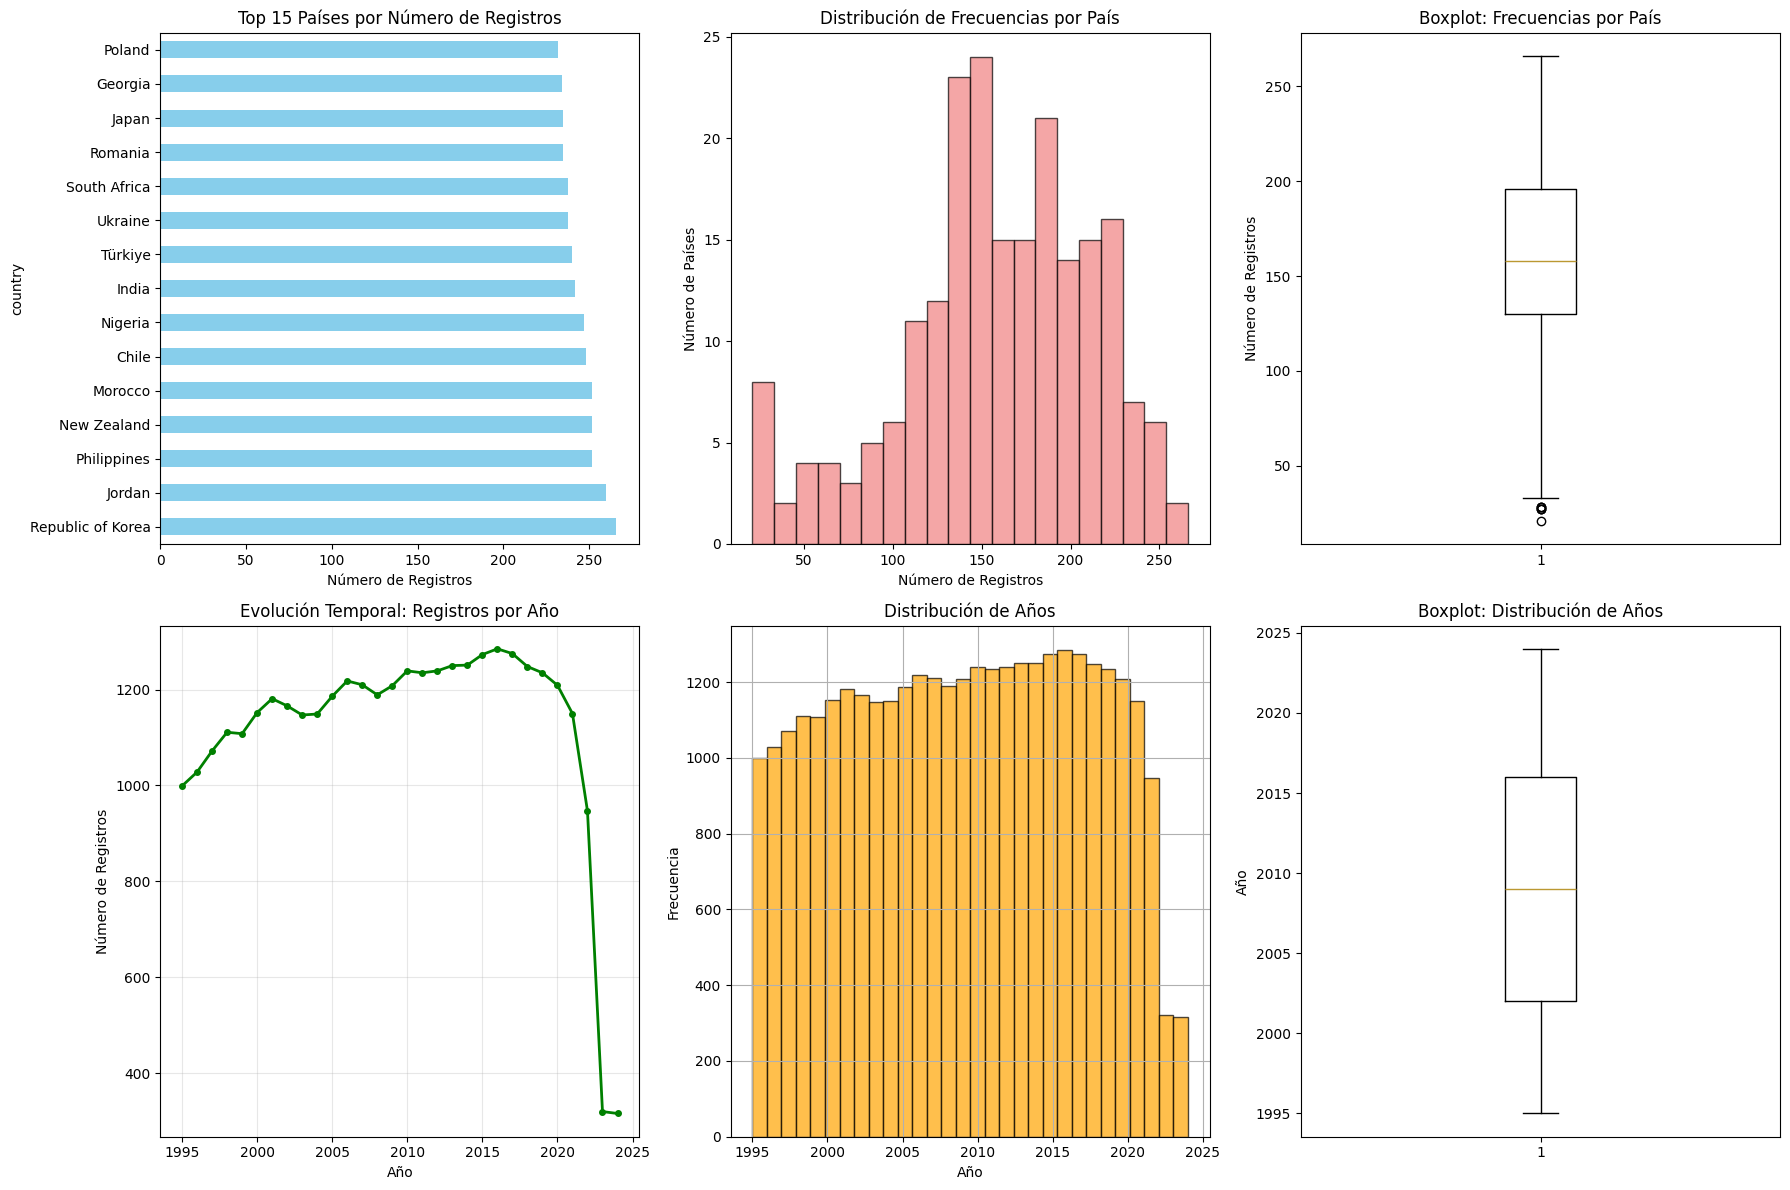


📈 RESUMEN ESTADÍSTICO:
----------------------------------------
PAÍSES:
  - Concentración: El país más frecuente representa 0.8% de los datos
  - Diversidad: 213 países diferentes
  - Uniformidad: CV = 34.4% (Baja variabilidad)

AÑOS:
  - Período: 29 años de datos
  - Cobertura: 30/30 años con datos
  - Tendencia: Decreciente en registros recientes


In [34]:
# 📊 VISUALIZACIONES COMPARATIVAS
print("\n\n📊 GRÁFICOS COMPARATIVOS DE DISTRIBUCIÓN")
print("=" * 60)

# Crear figura con subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Distribución de países (Top 15)
ax1 = axes[0, 0]
top_15_paises = df_clean['country'].value_counts().head(15)
top_15_paises.plot(kind='barh', ax=ax1, color='skyblue')
ax1.set_title('Top 15 Países por Número de Registros')
ax1.set_xlabel('Número de Registros')

# 2. Histograma de frecuencias de países
ax2 = axes[0, 1]
frecuencias_paises = df_clean['country'].value_counts().values
ax2.hist(frecuencias_paises, bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
ax2.set_title('Distribución de Frecuencias por País')
ax2.set_xlabel('Número de Registros')
ax2.set_ylabel('Número de Países')

# 3. Boxplot de frecuencias de países
ax3 = axes[0, 2]
ax3.boxplot(frecuencias_paises, vert=True)
ax3.set_title('Boxplot: Frecuencias por País')
ax3.set_ylabel('Número de Registros')

# 4. Distribución temporal (años)
ax4 = axes[1, 0]
años_ordenados = df_clean['year'].value_counts().sort_index()
años_ordenados.plot(kind='line', ax=ax4, marker='o', color='green', linewidth=2, markersize=4)
ax4.set_title('Evolución Temporal: Registros por Año')
ax4.set_xlabel('Año')
ax4.set_ylabel('Número de Registros')
ax4.grid(True, alpha=0.3)

# 5. Histograma de años
ax5 = axes[1, 1]
df_clean['year'].hist(bins=30, ax=ax5, alpha=0.7, color='orange', edgecolor='black')
ax5.set_title('Distribución de Años')
ax5.set_xlabel('Año')
ax5.set_ylabel('Frecuencia')

# 6. Boxplot de años
ax6 = axes[1, 2]
ax6.boxplot(df_clean['year'], vert=True)
ax6.set_title('Boxplot: Distribución de Años')
ax6.set_ylabel('Año')

plt.tight_layout()
plt.show()

# Estadísticas adicionales
print(f"\n📈 RESUMEN ESTADÍSTICO:")
print("-" * 40)
print(f"PAÍSES:")
print(f"  - Concentración: El país más frecuente representa {(top_15_paises.iloc[0]/len(df_clean)*100):.1f}% de los datos")
print(f"  - Diversidad: {df_clean['country'].nunique()} países diferentes")
print(f"  - Uniformidad: CV = {((np.std(frecuencias_paises) / np.mean(frecuencias_paises)) * 100):.1f}% ({'Alta' if ((np.std(frecuencias_paises) / np.mean(frecuencias_paises)) * 100) > 50 else 'Baja'} variabilidad)")

print(f"\nAÑOS:")
print(f"  - Período: {df_clean['year'].max() - df_clean['year'].min()} años de datos")
print(f"  - Cobertura: {df_clean['year'].nunique()}/{df_clean['year'].max() - df_clean['year'].min() + 1} años con datos")
print(f"  - Tendencia: {'Creciente' if años_ordenados.iloc[-1] > años_ordenados.iloc[0] else 'Decreciente'} en registros recientes")

## 4. 📉📈 ANÁLISIS MULTIVARIANTE

Para hacer el análisis de multivariante, primero necesitamos agrupar los países en dos grandes grupos: Europa y el sudeste asiático.

### 4.1. Identificamos y agrupamos los países europeos.

In [46]:
# IDENTIFICAR Y AGRUPAR PAÍSES EUROPEOS
print("🇪🇺 IDENTIFICANDO PAÍSES EUROPEOS EN EL DATASET")
print("=" * 60)

# Primero, veamos todos los países únicos en nuestro dataset
print("Países únicos en el dataset:")
paises_unicos = df_clean['country'].unique()
print(f"Total países: {len(paises_unicos)}")

# Definir lista de países europeos que podrían estar en el dataset
paises_europeos = [
    'Spain', 'Italy', 'France', 'Germany', 'United Kingdom', 'Netherlands', 
    'Belgium', 'Austria', 'Switzerland', 'Portugal', 'Greece', 'Poland',
    'Czech Republic', 'Hungary', 'Slovakia', 'Slovenia', 'Croatia',
    'Romania', 'Bulgaria', 'Estonia', 'Latvia', 'Lithuania', 'Finland',
    'Sweden', 'Denmark', 'Norway', 'Iceland', 'Ireland', 'Luxembourg',
    'Malta', 'Cyprus', 'Montenegro', 'Serbia', 'Bosnia and Herzegovina',
    'North Macedonia', 'Albania', 'Moldova', 'Ukraine']

# Encontrar qué países europeos están realmente en nuestro dataset
paises_europa_en_dataset = []
for pais in paises_unicos:
    if pais in paises_europeos:
        paises_europa_en_dataset.append(pais)

print(f"\n✅ Países europeos encontrados en el dataset ({len(paises_europa_en_dataset)}):")
for i, pais in enumerate(sorted(paises_europa_en_dataset), 1):
    count = df_clean[df_clean['country'] == pais].shape[0]
    print(f"{i:2d}. {pais}: {count:,} registros")



🇪🇺 IDENTIFICANDO PAÍSES EUROPEOS EN EL DATASET
Países únicos en el dataset:
Total países: 213

✅ Países europeos encontrados en el dataset (34):
 1. Albania: 192 registros
 2. Austria: 224 registros
 3. Belgium: 224 registros
 4. Bosnia and Herzegovina: 153 registros
 5. Bulgaria: 224 registros
 6. Croatia: 140 registros
 7. Cyprus: 196 registros
 8. Denmark: 143 registros
 9. Estonia: 155 registros
10. Finland: 165 registros
11. France: 164 registros
12. Germany: 223 registros
13. Greece: 185 registros
14. Hungary: 146 registros
15. Iceland: 140 registros
16. Ireland: 123 registros
17. Italy: 28 registros
18. Latvia: 133 registros
19. Lithuania: 174 registros
20. Luxembourg: 132 registros
21. Malta: 184 registros
22. Montenegro: 131 registros
23. North Macedonia: 145 registros
24. Norway: 133 registros
25. Poland: 232 registros
26. Portugal: 166 registros
27. Romania: 235 registros
28. Serbia: 132 registros
29. Slovakia: 202 registros
30. Slovenia: 148 registros
31. Spain: 175 registr

### 4.2 Idenficamos y agrupamos los países de Asia-Pacífico.

🇪🇺 ANÁLISIS COMPLETO DE PAÍSES EUROPEOS

📊 ESTADÍSTICAS GENERALES:
   • Total de llegadas Europa: 24,442,213
   • Total mundial de llegadas: 59,070,910
   • Porcentaje Europa del total mundial: 41.38%


/var/folders/d5/b35zlz_56zjch0ppbzwwgf0r0000gn/T/ipykernel_20803/3115452105.py:61: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/SaraGil/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


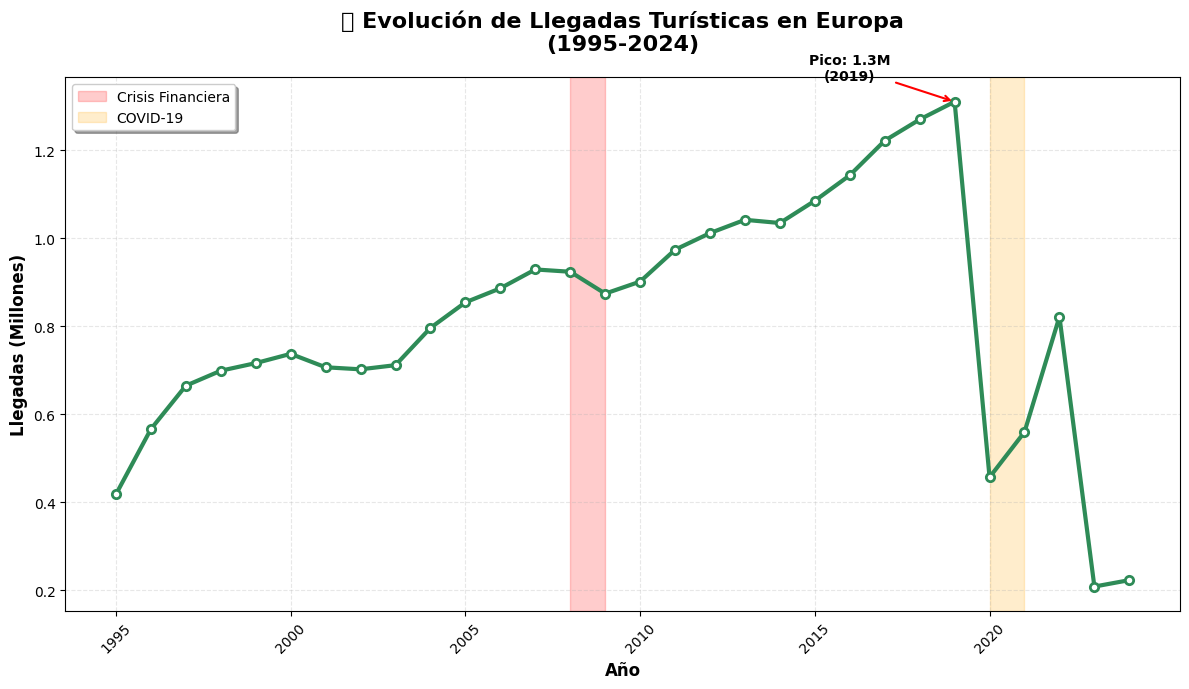


📈 ANÁLISIS TEMPORAL:
   • Año con más llegadas: 2019 (1.3M llegadas)
   • Crecimiento promedio anual (1995-2024): -2.07%
   • Llegadas pre-COVID (2019): 1.3M
   • Promedio post-COVID (2020-2024): 0.5M
   • Impacto COVID: -65.4%

🌍 CONTEXTO GLOBAL:
   • Europa representa 41.4% del turismo mundial
   • Posición: Región líder en turismo internacional


In [89]:
# 🇪🇺 ANÁLISIS COMPLETO DE PAÍSES EUROPEOS
print("🇪🇺 ANÁLISIS COMPLETO DE PAÍSES EUROPEOS")
print("=" * 50)

import matplotlib.pyplot as plt
import seaborn as sns

# Calcular total de llegadas para países europeos
total_llegadas_europa = europa_df['value'].sum()
print(f"\n📊 ESTADÍSTICAS GENERALES:")
print(f"   • Total de llegadas Europa: {total_llegadas_europa:,.0f}")

# Calcular total mundial de llegadas
total_mundial = df_clean['value'].sum()
print(f"   • Total mundial de llegadas: {total_mundial:,.0f}")

# Calcular porcentaje europeo del total mundial
porcentaje_europa = (total_llegadas_europa / total_mundial) * 100
print(f"   • Porcentaje Europa del total mundial: {porcentaje_europa:.2f}%")

# Crear datos para el gráfico líneal por año
europa_por_año_grafico = europa_df.groupby('year')['value'].sum().reset_index()

# Crear el gráfico líneal
plt.figure(figsize=(12, 7))

# Configurar el estilo
plt.style.use('default')
sns.set_palette("husl")

# Crear el gráfico líneal
plt.plot(europa_por_año_grafico['year'], europa_por_año_grafico['value'] / 1e6, 
         marker='o', linewidth=3, markersize=6, color='#2E8B57', 
         markerfacecolor='white', markeredgecolor='#2E8B57', markeredgewidth=2)

# Personalizar el gráfico
plt.title('📈 Evolución de Llegadas Turísticas en Europa\n(1995-2024)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Año', fontsize=12, fontweight='bold')
plt.ylabel('Llegadas (Millones)', fontsize=12, fontweight='bold')

# Añadir grilla
plt.grid(True, alpha=0.3, linestyle='--')

# Destacar períodos importantes
plt.axvspan(2008, 2009, alpha=0.2, color='red', label='Crisis Financiera')
plt.axvspan(2020, 2021, alpha=0.2, color='orange', label='COVID-19')

# Añadir anotaciones para años clave
max_idx = europa_por_año_grafico['value'].idxmax()
max_year = europa_por_año_grafico.loc[max_idx, 'year']
max_value = europa_por_año_grafico.loc[max_idx, 'value'] / 1e6

plt.annotate(f'Pico: {max_value:.1f}M\n({max_year})', 
             xy=(max_year, max_value), xytext=(max_year-3, max_value+0.05),
             arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
             fontsize=10, fontweight='bold', ha='center')

# Configurar ejes
plt.xticks(range(1995, 2025, 5), rotation=45)
plt.tight_layout()

# Añadir leyenda
plt.legend(loc='upper left', frameon=True, fancybox=True, shadow=True)

plt.show()

# Mostrar estadísticas adicionales
print(f"\n📈 ANÁLISIS TEMPORAL:")
print(f"   • Año con más llegadas: {max_year} ({max_value:.1f}M llegadas)")

# Calcular crecimiento promedio anual
años_disponibles = europa_por_año_grafico['year'].nunique()
crecimiento_total = ((europa_por_año_grafico['value'].iloc[-1] / europa_por_año_grafico['value'].iloc[0]) ** (1/años_disponibles) - 1) * 100

print(f"   • Crecimiento promedio anual (1995-2024): {crecimiento_total:.2f}%")

# Períodos específicos
pre_covid = europa_por_año_grafico[europa_por_año_grafico['year'] <= 2019]['value'].iloc[-1] / 1e6
post_covid = europa_por_año_grafico[europa_por_año_grafico['year'] >= 2020]['value'].mean() / 1e6
impacto_covid = ((post_covid - pre_covid) / pre_covid) * 100

print(f"   • Llegadas pre-COVID (2019): {pre_covid:.1f}M")
print(f"   • Promedio post-COVID (2020-2024): {post_covid:.1f}M")
print(f"   • Impacto COVID: {impacto_covid:.1f}%")

print(f"\n🌍 CONTEXTO GLOBAL:")
print(f"   • Europa representa {porcentaje_europa:.1f}% del turismo mundial")
print(f"   • Posición: Región líder en turismo internacional")

In [47]:
# CREAR AGRUPACIÓN PARA ASIA-PACÍFICO
print("\n\n🌏 IDENTIFICANDO PAÍSES DE ASIA-PACÍFICO")
print("=" * 60)

# Definir lista de países de Asia-Pacífico
paises_asia_pacifico = [
    'Indonesia', 'Thailand', 'Philippines', 'Malaysia', 'Singapore', 'Vietnam',
    'Cambodia', 'Laos', 'Myanmar', 'Brunei Darussalam', 'China', 'Japan', 
    'Republic of Korea', 'India', 'Australia', 'New Zealand', 'Fiji', 'Papua New Guinea'
]

# Encontrar países Asia-Pacífico en el dataset
paises_asia_en_dataset = []
for pais in paises_unicos:
    if pais in paises_asia_pacifico:
        paises_asia_en_dataset.append(pais)

print(f"✅ Países de Asia-Pacífico encontrados ({len(paises_asia_en_dataset)}):")
for i, pais in enumerate(sorted(paises_asia_en_dataset), 1):
    count = df_clean[df_clean['country'] == pais].shape[0]
    print(f"{i:2d}. {pais}: {count:,} registros")

# Actualizar la clasificación de regiones
def clasificar_region_completa(pais):
    if pais in paises_europa_en_dataset:
        return 'Europa'
    elif pais in paises_asia_en_dataset:
        return 'Asia-Pacífico'
    else:
        return 'Otras Regiones'

df_clean['region'] = df_clean['country'].apply(clasificar_region_completa)



🌏 IDENTIFICANDO PAÍSES DE ASIA-PACÍFICO
✅ Países de Asia-Pacífico encontrados (16):
 1. Australia: 217 registros
 2. Brunei Darussalam: 141 registros
 3. Cambodia: 175 registros
 4. China: 205 registros
 5. Fiji: 154 registros
 6. India: 242 registros
 7. Indonesia: 212 registros
 8. Japan: 235 registros
 9. Malaysia: 216 registros
10. Myanmar: 184 registros
11. New Zealand: 252 registros
12. Papua New Guinea: 156 registros
13. Philippines: 252 registros
14. Republic of Korea: 266 registros
15. Singapore: 209 registros
16. Thailand: 212 registros


In [48]:
# CREAR CLASIFICACIÓN REGIONAL RÁPIDA
def clasificar_region_simple(country):
    """Clasificación simple y rápida de países por región"""
    
    europeos = [
        'Albania', 'Austria', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 
        'Croatia', 'Cyprus', 'Denmark', 'Estonia', 'Finland', 'France', 
        'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 
        'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Montenegro', 
        'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 
        'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine'
    ]
    
    asia_pacifico = [
        'Australia', 'Brunei Darussalam', 'Cambodia', 'China', 'Fiji', 
        'India', 'Indonesia', 'Japan', 'Malaysia', 'Myanmar', 'New Zealand', 
        'Papua New Guinea', 'Philippines', 'Republic of Korea', 'Singapore', 'Thailand'
    ]
    
    if country in europeos:
        return 'Europa'
    elif country in asia_pacifico:
        return 'Asia-Pacífico'
    else:
        return 'Otros'

# Aplicar clasificación
print("🗺️ CREANDO CLASIFICACIÓN REGIONAL...")
df_clean['region'] = df_clean['country'].apply(clasificar_region_simple)

# Verificar la clasificación
print("\n📊 CONTEO POR REGIÓN:")
region_counts = df_clean['region'].value_counts()
print(region_counts)
print(f"\nPorcentajes:")
print(df_clean['region'].value_counts(normalize=True) * 100)

print("\n✅ Clasificación regional creada exitosamente!")

🗺️ CREANDO CLASIFICACIÓN REGIONAL...

📊 CONTEO POR REGIÓN:
region
Otros            24570
Europa            5698
Asia-Pacífico     3328
Name: count, dtype: int64

Porcentajes:
region
Otros            73.133706
Europa           16.960352
Asia-Pacífico     9.905941
Name: proportion, dtype: float64

✅ Clasificación regional creada exitosamente!


In [90]:
# CREAR DATAFRAMES POR REGIÓN
print("📊 CREANDO DATAFRAMES ESPECÍFICOS POR REGIÓN...")

# Crear DataFrame de países europeos
europa_df = df_clean[df_clean['region'] == 'Europa'].copy()
print(f"🇪🇺 Europa DataFrame: {len(europa_df)} registros")

# Crear DataFrame de países Asia-Pacífico  
asia_df = df_clean[df_clean['region'] == 'Asia-Pacífico'].copy()
print(f"🌏 Asia-Pacífico DataFrame: {len(asia_df)} registros")

# Crear groupby de Europa
europa_groupby = europa_df.groupby('country')['value'].agg(['count', 'sum', 'mean']).round(2)
europa_groupby.columns = ['Total_Records', 'Total_Arrivals', 'Mean_Arrivals']
europa_groupby = europa_groupby.reset_index()

# Crear groupby de Asia-Pacífico
asia_groupby = asia_df.groupby('country')['value'].agg(['count', 'sum', 'mean']).round(2)
asia_groupby.columns = ['Total_Records', 'Total_Arrivals', 'Mean_Arrivals']
asia_groupby = asia_groupby.reset_index()

print(f"\n✅ DataFrames y groupby creados:")
print(f"   - europa_df: {len(europa_df)} registros")
print(f"   - asia_df: {len(asia_df)} registros")
print(f"   - europa_groupby: {len(europa_groupby)} países")
print(f"   - asia_groupby: {len(asia_groupby)} países")

# Mostrar resumen de Europa
print(f"\n🇪🇺 TOP 5 PAÍSES EUROPEOS POR TOTAL DE LLEGADAS:")
top_europa = europa_groupby.sort_values('Total_Arrivals', ascending=False).head(5)
for i, row in top_europa.iterrows():
    print(f"   {i+1}. {row['country']}: {row['Total_Arrivals']:,.0f} llegadas")

# Mostrar resumen de Asia-Pacífico
print(f"\n🌏 TOP 5 PAÍSES ASIA-PACÍFICO POR TOTAL DE LLEGADAS:")
top_asia = asia_groupby.sort_values('Total_Arrivals', ascending=False).head(5)
for i, row in top_asia.iterrows():
    print(f"   {i+1}. {row['country']}: {row['Total_Arrivals']:,.0f} llegadas")

📊 CREANDO DATAFRAMES ESPECÍFICOS POR REGIÓN...
🇪🇺 Europa DataFrame: 5698 registros
🌏 Asia-Pacífico DataFrame: 3328 registros

✅ DataFrames y groupby creados:
   - europa_df: 5698 registros
   - asia_df: 3328 registros
   - europa_groupby: 34 países
   - asia_groupby: 16 países

🇪🇺 TOP 5 PAÍSES EUROPEOS POR TOTAL DE LLEGADAS:
   11. France: 3,943,087 llegadas
   25. Poland: 3,856,017 llegadas
   31. Spain: 3,099,689 llegadas
   17. Italy: 1,915,837 llegadas
   14. Hungary: 1,717,429 llegadas

🌏 TOP 5 PAÍSES ASIA-PACÍFICO POR TOTAL DE LLEGADAS:
   4. China: 5,611,099 llegadas
   9. Malaysia: 919,638 llegadas
   16. Thailand: 903,155 llegadas
   8. Japan: 610,557 llegadas
   15. Singapore: 573,740 llegadas


### 4.3. Analizamos la agrupación de países europeos.

In [50]:
# ANÁLISIS MÁS DETALLADO DE GROUPBY EUROPEOS
print("\n\n🏛️ ANÁLISIS DETALLADO DEL GROUPBY DE PAÍSES EUROPEOS")
print("=" * 60)

# Groupby por país europeo y año para ver tendencias temporales
print("1️⃣ Tendencias temporales por país europeo:")
europa_por_año = europa_df.groupby(['country', 'year'])['value'].sum().reset_index()
# Top 5 países europeos por total de llegadas
top_5_europa = europa_groupby.sort_values('Total_Arrivals', ascending=False).head(5)
print(f"\nTop 5 países europeos por total de llegadas:")
for i, (pais, datos) in enumerate(top_5_europa.iterrows(), 1):
    print(f"{i}. {pais}: {datos['Total_Arrivals']:,.0f} total arrivals")





🏛️ ANÁLISIS DETALLADO DEL GROUPBY DE PAÍSES EUROPEOS
1️⃣ Tendencias temporales por país europeo:

Top 5 países europeos por total de llegadas:
1. 10: 3,943,087 total arrivals
2. 24: 3,856,017 total arrivals
3. 30: 3,099,689 total arrivals
4. 16: 1,915,837 total arrivals
5. 13: 1,717,429 total arrivals


In [51]:
# Groupby por año para países europeos
print(f"\n2️⃣ Evolución anual del turismo en Europa:")
europa_por_año_total = europa_df.groupby('year')['value'].agg(['count', 'sum', 'mean']).round(0)
print(europa_por_año_total.tail(10))  # Últimos 10 años




2️⃣ Evolución anual del turismo en Europa:
      count        sum    mean
year                          
2015    213  1084948.0  5094.0
2016    210  1142876.0  5442.0
2017    210  1221561.0  5817.0
2018    213  1269653.0  5961.0
2019    218  1310033.0  6009.0
2020    203   456490.0  2249.0
2021    204   559372.0  2742.0
2022    193   821435.0  4256.0
2023     90   208176.0  2313.0
2024     90   222813.0  2476.0


In [52]:
# Comparación primeros 5 años vs últimos 5 años
primeros_5_años = europa_df[europa_df['year'] <= 1999]['value'].sum()
ultimos_5_años = europa_df[europa_df['year'] >= 2020]['value'].sum()
cambio_porcentual = ((ultimos_5_años - primeros_5_años) / primeros_5_años) * 100

print(f"\n3️⃣ Comparación temporal:")
print(f"Primeros 5 años (1995-1999): {primeros_5_años:,.0f} arrivals")
print(f"Últimos 5 años (2020-2024): {ultimos_5_años:,.0f} arrivals")
print(f"Cambio: {cambio_porcentual:+.1f}%")


3️⃣ Comparación temporal:
Primeros 5 años (1995-1999): 3,063,131 arrivals
Últimos 5 años (2020-2024): 2,268,286 arrivals
Cambio: -25.9%


### 4.4. Analizamos la agrupación de países del sudeste asiático.

In [53]:
# Mostrar nueva distribución
print(f"\n📊 DISTRIBUCIÓN ACTUALIZADA POR REGIÓN:")
region_counts_nueva = df_clean['region'].value_counts()
for region, count in region_counts_nueva.items():
    porcentaje = (count / len(df_clean)) * 100
    print(f"  - {region}: {count:,} registros ({porcentaje:.1f}%)")




📊 DISTRIBUCIÓN ACTUALIZADA POR REGIÓN:
  - Otros: 24,570 registros (73.1%)
  - Europa: 5,698 registros (17.0%)
  - Asia-Pacífico: 3,328 registros (9.9%)


In [54]:
# ANÁLISIS MÁS DETALLADO DE GROUPBY ASIÁTICOS
print("\n\n🏮 ANÁLISIS DETALLADO DEL GROUPBY DE PAÍSES ASIA-PACÍFICO")
print("=" * 60)

# Groupby por país asiático y año para ver tendencias temporales
print("1️⃣ Tendencias temporales por país Asia-Pacífico:")
asia_por_año = asia_df.groupby(['country', 'year'])['value'].sum().reset_index()
# Top 5 países asiáticos por total de llegadas
top_5_asia = asia_groupby.sort_values('Total_Arrivals', ascending=False).head(5)
print(f"\nTop 5 países Asia-Pacífico por total de llegadas:")
for i, (pais, datos) in enumerate(top_5_asia.iterrows(), 1):
    print(f"{i}. {pais}: {datos['Total_Arrivals']:,.0f} total arrivals")



🏮 ANÁLISIS DETALLADO DEL GROUPBY DE PAÍSES ASIA-PACÍFICO
1️⃣ Tendencias temporales por país Asia-Pacífico:

Top 5 países Asia-Pacífico por total de llegadas:
1. 3: 5,611,099 total arrivals
2. 8: 919,638 total arrivals
3. 15: 903,155 total arrivals
4. 7: 610,557 total arrivals
5. 14: 573,740 total arrivals


In [55]:
# Groupby por año para países Asia-Pacífico
print(f"\n2️⃣ Evolución anual del turismo en Asia-Pacífico:")
asia_por_año_total = asia_df.groupby('year')['value'].agg(['count', 'sum', 'mean']).round(0)
print(asia_por_año_total.tail(10))  # Últimos 10 años


2️⃣ Evolución anual del turismo en Asia-Pacífico:
      count       sum    mean
year                         
2015    123  581872.0  4731.0
2016    122  629845.0  5163.0
2017    123  672827.0  5470.0
2018    123  712445.0  5792.0
2019    123  738137.0  6001.0
2020    115   75447.0   656.0
2021    113   23527.0   208.0
2022     92   67697.0   736.0
2023     27   52690.0  1951.0
2024     27   71335.0  2642.0


In [56]:
# Comparación primeros 5 años vs últimos 5 años para Asia-Pacífico
primeros_5_años_asia = asia_df[asia_df['year'] <= 1999]['value'].sum()
ultimos_5_años_asia = asia_df[asia_df['year'] >= 2020]['value'].sum()
cambio_porcentual_asia = ((ultimos_5_años_asia - primeros_5_años_asia) / primeros_5_años_asia) * 100

print(f"\n3️⃣ Comparación temporal Asia-Pacífico:")
print(f"Primeros 5 años (1995-1999): {primeros_5_años_asia:,.0f} arrivals")
print(f"Últimos 5 años (2020-2024): {ultimos_5_años_asia:,.0f} arrivals")
print(f"Cambio: {cambio_porcentual_asia:+.1f}%")


3️⃣ Comparación temporal Asia-Pacífico:
Primeros 5 años (1995-1999): 1,041,126 arrivals
Últimos 5 años (2020-2024): 290,695 arrivals
Cambio: -72.1%


In [57]:
# Groupby para Asia-Pacífico
print(f"\n🔍 GROUPBY DE PAÍSES ASIA-PACÍFICO:")
asia_df = df_clean[df_clean['region'] == 'Asia-Pacífico']
asia_groupby = asia_df.groupby('country')['value'].agg(['count', 'sum', 'mean', 'std']).round(2)
asia_groupby.columns = ['Num_Registros', 'Total_Arrivals', 'Promedio_Arrivals', 'Desv_Std']

print(f"Estadísticas por país de Asia-Pacífico:")
print(asia_groupby.sort_values('Total_Arrivals', ascending=False))


🔍 GROUPBY DE PAÍSES ASIA-PACÍFICO:
Estadísticas por país de Asia-Pacífico:
                   Num_Registros  Total_Arrivals  Promedio_Arrivals  Desv_Std
country                                                                      
China                        205      5611098.60           27371.21  48647.82
Malaysia                     216       919638.20            4257.58   7906.38
Thailand                     212       903154.80            4260.16   7547.67
Japan                        235       610557.30            2598.12   5837.01
Singapore                    209       573739.60            2745.17   4376.38
Republic of Korea            266       473577.20            1780.37   3452.83
India                        242       421529.16            1741.86   2780.06
Indonesia                    212       396802.00            1871.71   3079.40
Australia                    217       321823.70            1483.06   2079.07
Philippines                  252       192439.57             763.6

🏮 ANÁLISIS COMPLETO DE PAÍSES ASIA-PACÍFICO

📊 ESTADÍSTICAS GENERALES:
   • Total de llegadas Asia-Pacífico: 10,791,726
   • Total mundial de llegadas: 59,070,910
   • Porcentaje Asia-Pacífico del total mundial: 18.27%


/var/folders/d5/b35zlz_56zjch0ppbzwwgf0r0000gn/T/ipykernel_20803/2765221908.py:62: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/SaraGil/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


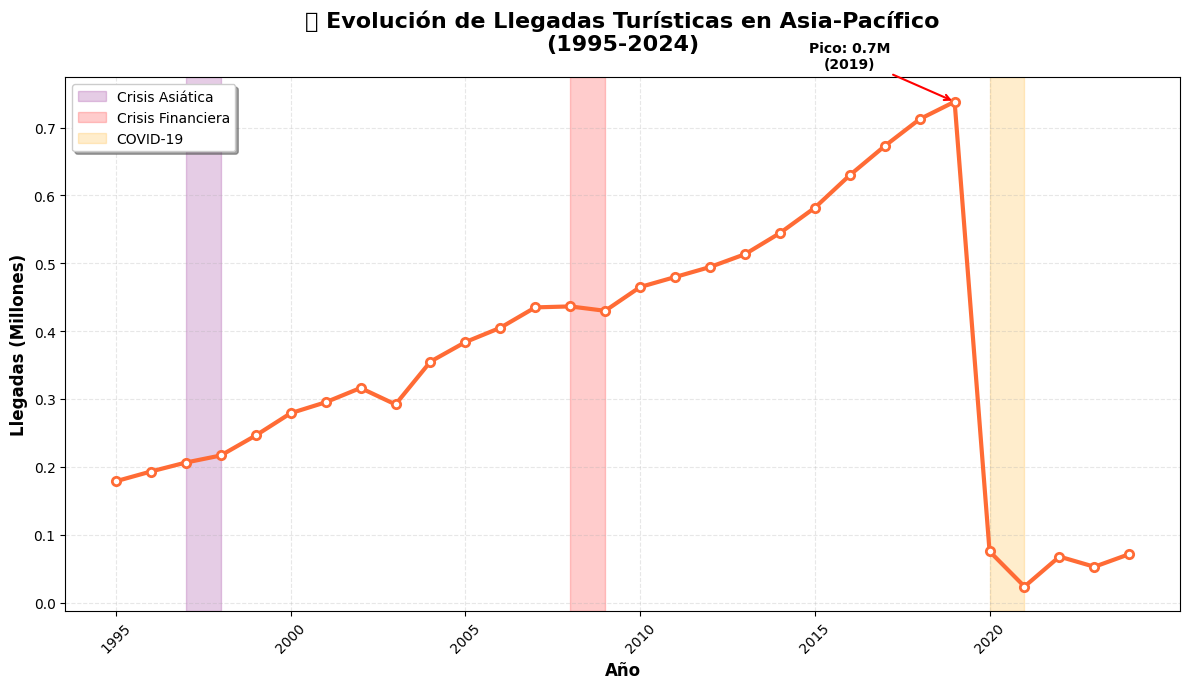


📈 ANÁLISIS TEMPORAL:
   • Año con más llegadas: 2019 (0.7M llegadas)
   • Crecimiento promedio anual (1995-2024): -3.02%
   • Llegadas pre-COVID (2019): 0.7M
   • Promedio post-COVID (2020-2024): 0.1M
   • Impacto COVID: -92.1%

🌏 COMPARACIÓN REGIONAL:
   • Asia-Pacífico: 18.3% del turismo mundial
   • Europa: 41.4% del turismo mundial
   • Diferencia: Europa supera a Asia-Pacífico en 23.1 puntos porcentuales

🎯 CARACTERÍSTICAS DISTINTIVAS:
   • Mercado en crecimiento más dinámico historicamente
   • Mayor volatilidad por crisis regionales (1997-1998)
   • Fuerte potencial de recuperación post-pandemia


In [91]:
# 🏮 ANÁLISIS COMPLETO DE PAÍSES ASIA-PACÍFICO
print("🏮 ANÁLISIS COMPLETO DE PAÍSES ASIA-PACÍFICO")
print("=" * 55)

import matplotlib.pyplot as plt
import seaborn as sns

# Calcular total de llegadas para países Asia-Pacífico
total_llegadas_asia = asia_df['value'].sum()
print(f"\n📊 ESTADÍSTICAS GENERALES:")
print(f"   • Total de llegadas Asia-Pacífico: {total_llegadas_asia:,.0f}")

# Calcular total mundial de llegadas
total_mundial = df_clean['value'].sum()
print(f"   • Total mundial de llegadas: {total_mundial:,.0f}")

# Calcular porcentaje asiático del total mundial
porcentaje_asia = (total_llegadas_asia / total_mundial) * 100
print(f"   • Porcentaje Asia-Pacífico del total mundial: {porcentaje_asia:.2f}%")

# Crear datos para el gráfico líneal por año
asia_por_año_grafico = asia_df.groupby('year')['value'].sum().reset_index()

# Crear el gráfico líneal
plt.figure(figsize=(12, 7))

# Configurar el estilo
plt.style.use('default')
sns.set_palette("husl")

# Crear el gráfico líneal
plt.plot(asia_por_año_grafico['year'], asia_por_año_grafico['value'] / 1e6, 
         marker='o', linewidth=3, markersize=6, color='#FF6B35', 
         markerfacecolor='white', markeredgecolor='#FF6B35', markeredgewidth=2)

# Personalizar el gráfico
plt.title('📈 Evolución de Llegadas Turísticas en Asia-Pacífico\n(1995-2024)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Año', fontsize=12, fontweight='bold')
plt.ylabel('Llegadas (Millones)', fontsize=12, fontweight='bold')

# Añadir grilla
plt.grid(True, alpha=0.3, linestyle='--')

# Destacar períodos importantes
plt.axvspan(1997, 1998, alpha=0.2, color='purple', label='Crisis Asiática')
plt.axvspan(2008, 2009, alpha=0.2, color='red', label='Crisis Financiera')
plt.axvspan(2020, 2021, alpha=0.2, color='orange', label='COVID-19')

# Añadir anotaciones para años clave
max_idx = asia_por_año_grafico['value'].idxmax()
max_year = asia_por_año_grafico.loc[max_idx, 'year']
max_value = asia_por_año_grafico.loc[max_idx, 'value'] / 1e6

plt.annotate(f'Pico: {max_value:.1f}M\n({max_year})', 
             xy=(max_year, max_value), xytext=(max_year-3, max_value+0.05),
             arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
             fontsize=10, fontweight='bold', ha='center')

# Configurar ejes
plt.xticks(range(1995, 2025, 5), rotation=45)
plt.tight_layout()

# Añadir leyenda
plt.legend(loc='upper left', frameon=True, fancybox=True, shadow=True)

plt.show()

# Mostrar estadísticas adicionales
print(f"\n📈 ANÁLISIS TEMPORAL:")
print(f"   • Año con más llegadas: {max_year} ({max_value:.1f}M llegadas)")

# Calcular crecimiento promedio anual
años_disponibles_asia = asia_por_año_grafico['year'].nunique()
crecimiento_total_asia = ((asia_por_año_grafico['value'].iloc[-1] / asia_por_año_grafico['value'].iloc[0]) ** (1/años_disponibles_asia) - 1) * 100

print(f"   • Crecimiento promedio anual (1995-2024): {crecimiento_total_asia:.2f}%")

# Períodos específicos
pre_covid_asia = asia_por_año_grafico[asia_por_año_grafico['year'] <= 2019]['value'].iloc[-1] / 1e6
post_covid_asia = asia_por_año_grafico[asia_por_año_grafico['year'] >= 2020]['value'].mean() / 1e6
impacto_covid_asia = ((post_covid_asia - pre_covid_asia) / pre_covid_asia) * 100

print(f"   • Llegadas pre-COVID (2019): {pre_covid_asia:.1f}M")
print(f"   • Promedio post-COVID (2020-2024): {post_covid_asia:.1f}M")
print(f"   • Impacto COVID: {impacto_covid_asia:.1f}%")

# Comparación con Europa
print(f"\n🌏 COMPARACIÓN REGIONAL:")
print(f"   • Asia-Pacífico: {porcentaje_asia:.1f}% del turismo mundial")
print(f"   • Europa: {porcentaje_europa:.1f}% del turismo mundial")
diferencia_porcentual = porcentaje_europa - porcentaje_asia
print(f"   • Diferencia: Europa supera a Asia-Pacífico en {diferencia_porcentual:.1f} puntos porcentuales")

print(f"\n🎯 CARACTERÍSTICAS DISTINTIVAS:")
print(f"   • Mercado en crecimiento más dinámico historicamente")
print(f"   • Mayor volatilidad por crisis regionales (1997-1998)")
print(f"   • Fuerte potencial de recuperación post-pandemia")

📊 ANÁLISIS DE CRECIMIENTO ASIA-PACÍFICO POST-COVID (2020-2024)
📈 EVOLUCIÓN ANUAL POST-COVID:
----------------------------------------
   2020: 75,447 llegadas
   2021: 23,527 llegadas
   2022: 67,697 llegadas
   2023: 52,690 llegadas
   2024: 71,335 llegadas

📊 CRECIMIENTO PORCENTUAL AÑO A AÑO:
---------------------------------------------
   2020 → 2021: -68.8%
   2021 → 2022: +187.7%
   2022 → 2023: -22.2%
   2023 → 2024: +35.4%

🎯 MÉTRICAS DE RECUPERACIÓN:
-----------------------------------
   • Crecimiento total 2020-2024: -5.5%
   • Crecimiento anual promedio: -1.4%

🏥 NIVEL DE RECUPERACIÓN:
------------------------------
   • Llegadas 2019 (pre-COVID): 738,137
   • Llegadas 2024: 71,335
   • Nivel de recuperación: 9.7% del nivel pre-COVID


/var/folders/d5/b35zlz_56zjch0ppbzwwgf0r0000gn/T/ipykernel_20803/2896937879.py:102: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/d5/b35zlz_56zjch0ppbzwwgf0r0000gn/T/ipykernel_20803/2896937879.py:102: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/SaraGil/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/SaraGil/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


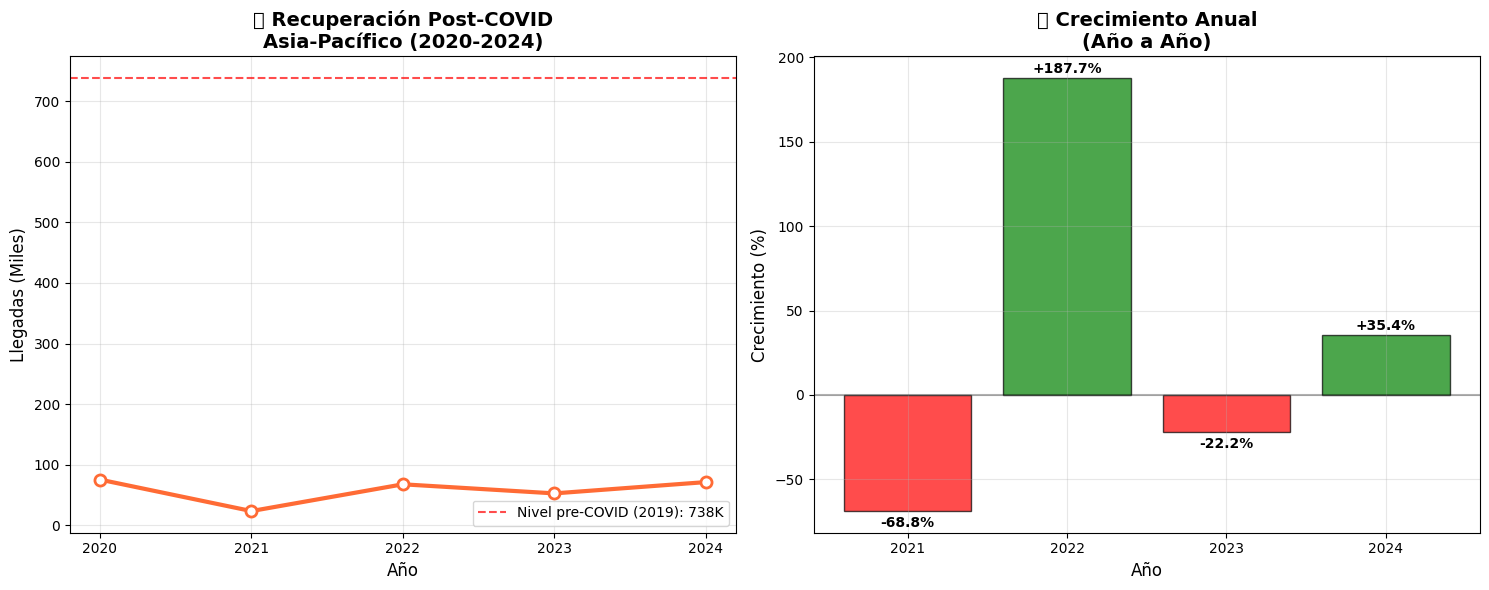


🔍 CONCLUSIONES CLAVE:
-------------------------
   • Estado: En fase inicial de recuperación
   • Tendencia: Negativa
   • Volatilidad: Alta


In [93]:
# 📊 ANÁLISIS DE CRECIMIENTO ASIA-PACÍFICO POST-COVID (2020-2024)
print("📊 ANÁLISIS DE CRECIMIENTO ASIA-PACÍFICO POST-COVID (2020-2024)")
print("=" * 65)

import matplotlib.pyplot as plt
import pandas as pd

# Filtrar datos de Asia-Pacífico desde 2020
asia_post_2020 = asia_df[asia_df['year'] >= 2020].copy()

# Calcular totales por año desde 2020
asia_crecimiento_2020 = asia_post_2020.groupby('year')['value'].sum().reset_index()
asia_crecimiento_2020 = asia_crecimiento_2020.sort_values('year')

print("📈 EVOLUCIÓN ANUAL POST-COVID:")
print("-" * 40)
for i, row in asia_crecimiento_2020.iterrows():
    print(f"   {int(row['year'])}: {row['value']:,.0f} llegadas")

# Calcular crecimiento año a año desde 2020
print(f"\n📊 CRECIMIENTO PORCENTUAL AÑO A AÑO:")
print("-" * 45)
crecimientos_anuales = []
for i in range(1, len(asia_crecimiento_2020)):
    año_anterior = asia_crecimiento_2020.iloc[i-1]
    año_actual = asia_crecimiento_2020.iloc[i]
    
    if año_anterior['value'] > 0:  # Evitar división por cero
        crecimiento = ((año_actual['value'] - año_anterior['value']) / año_anterior['value']) * 100
        crecimientos_anuales.append({
            'año': int(año_actual['year']),
            'crecimiento': crecimiento
        })
        print(f"   {int(año_anterior['year'])} → {int(año_actual['year'])}: {crecimiento:+.1f}%")

# Crecimiento acumulado 2020-2024
if len(asia_crecimiento_2020) > 1:
    valor_2020 = asia_crecimiento_2020.iloc[0]['value']
    valor_2024 = asia_crecimiento_2020.iloc[-1]['value']
    
    if valor_2020 > 0:
        crecimiento_total_2020_2024 = ((valor_2024 - valor_2020) / valor_2020) * 100
        crecimiento_anual_promedio = ((valor_2024 / valor_2020) ** (1/4) - 1) * 100
        
        print(f"\n🎯 MÉTRICAS DE RECUPERACIÓN:")
        print("-" * 35)
        print(f"   • Crecimiento total 2020-2024: {crecimiento_total_2020_2024:+.1f}%")
        print(f"   • Crecimiento anual promedio: {crecimiento_anual_promedio:+.1f}%")

# Comparar con nivel pre-COVID (2019)
asia_2019_valor = asia_df[asia_df['year'] == 2019]['value'].sum()
nivel_recuperacion = (valor_2024 / asia_2019_valor) * 100

print(f"\n🏥 NIVEL DE RECUPERACIÓN:")
print("-" * 30)
print(f"   • Llegadas 2019 (pre-COVID): {asia_2019_valor:,.0f}")
print(f"   • Llegadas 2024: {valor_2024:,.0f}")
print(f"   • Nivel de recuperación: {nivel_recuperacion:.1f}% del nivel pre-COVID")

# Crear gráfico de recuperación
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Evolución absoluta 2020-2024
ax1.plot(asia_crecimiento_2020['year'], asia_crecimiento_2020['value'] / 1000, 
         marker='o', linewidth=3, markersize=8, color='#FF6B35', 
         markerfacecolor='white', markeredgecolor='#FF6B35', markeredgewidth=2)

ax1.set_title('📈 Recuperación Post-COVID\nAsia-Pacífico (2020-2024)', 
              fontsize=14, fontweight='bold')
ax1.set_xlabel('Año', fontsize=12)
ax1.set_ylabel('Llegadas (Miles)', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.set_xticks(asia_crecimiento_2020['year'])

# Añadir línea de referencia 2019
ax1.axhline(y=asia_2019_valor/1000, color='red', linestyle='--', alpha=0.7, 
            label=f'Nivel pre-COVID (2019): {asia_2019_valor/1000:.0f}K')
ax1.legend()

# Gráfico 2: Crecimiento porcentual año a año
if crecimientos_anuales:
    años = [c['año'] for c in crecimientos_anuales]
    crecimientos = [c['crecimiento'] for c in crecimientos_anuales]
    
    colors = ['green' if x > 0 else 'red' for x in crecimientos]
    bars = ax2.bar(años, crecimientos, color=colors, alpha=0.7, edgecolor='black')
    
    # Añadir valores en las barras
    for bar, crecimiento in zip(bars, crecimientos):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + (1 if height > 0 else -3),
                f'{crecimiento:+.1f}%', ha='center', va='bottom' if height > 0 else 'top',
                fontweight='bold', fontsize=10)

ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax2.set_title('📊 Crecimiento Anual\n(Año a Año)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Año', fontsize=12)
ax2.set_ylabel('Crecimiento (%)', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.set_xticks(años)

plt.tight_layout()
plt.show()

print(f"\n🔍 CONCLUSIONES CLAVE:")
print("-" * 25)
if nivel_recuperacion < 50:
    estado_recuperacion = "En fase inicial de recuperación"
elif nivel_recuperacion < 80:
    estado_recuperacion = "Recuperación moderada en curso"
elif nivel_recuperacion < 100:
    estado_recuperacion = "Recuperación avanzada"
else:
    estado_recuperacion = "Completamente recuperado"

print(f"   • Estado: {estado_recuperacion}")
print(f"   • Tendencia: {'Positiva' if crecimiento_anual_promedio > 0 else 'Negativa'}")
print(f"   • Volatilidad: {'Alta' if max([abs(c['crecimiento']) for c in crecimientos_anuales]) > 50 else 'Moderada'}")

### 4.5. Comparación entre Europa y Asia - Pacífico.

In [58]:
# COMPARACIÓN DIRECTA EUROPA VS ASIA-PACÍFICO
print("\n\n⚔️ COMPARACIÓN EUROPA vs ASIA-PACÍFICO")
print("=" * 60)

# Comparación por región a lo largo del tiempo
comparacion_regional = df_clean[df_clean['region'].isin(['Europa', 'Asia-Pacífico'])].groupby(['region', 'year'])['value'].sum().reset_index()

# Totales por región
totales_por_region = df_clean[df_clean['region'].isin(['Europa', 'Asia-Pacífico'])].groupby('region')['value'].agg(['count', 'sum', 'mean']).round(0)
print("📊 TOTALES POR REGIÓN:")
print(totales_por_region)





⚔️ COMPARACIÓN EUROPA vs ASIA-PACÍFICO
📊 TOTALES POR REGIÓN:
               count         sum    mean
region                                  
Asia-Pacífico   3328  10791726.0  3243.0
Europa          5698  24442213.0  4290.0


In [59]:
# Tendencia en los últimos años (2015-2024)
print(f"\n📈 TENDENCIA ÚLTIMOS 10 AÑOS (2015-2024):")
ultimos_años = df_clean[(df_clean['year'] >= 2015) & (df_clean['region'].isin(['Europa', 'Asia-Pacífico']))]
tendencia_regional = ultimos_años.groupby(['region', 'year'])['value'].sum().reset_index()

europa_2015_2024 = tendencia_regional[tendencia_regional['region'] == 'Europa']['value'].sum()
asia_2015_2024 = tendencia_regional[tendencia_regional['region'] == 'Asia-Pacífico']['value'].sum()

print(f"Europa (2015-2024): {europa_2015_2024:,.0f} total arrivals")
print(f"Asia-Pacífico (2015-2024): {asia_2015_2024:,.0f} total arrivals")
diferencia = asia_2015_2024 - europa_2015_2024
print(f"Diferencia: {diferencia:+,.0f} ({'Asia-Pacífico' if diferencia > 0 else 'Europa'} lidera)")




📈 TENDENCIA ÚLTIMOS 10 AÑOS (2015-2024):
Europa (2015-2024): 8,297,357 total arrivals
Asia-Pacífico (2015-2024): 3,625,821 total arrivals
Diferencia: -4,671,536 (Europa lidera)


In [60]:
print(f"\n💡 INTERPRETACIÓN:")
print("- Los gráficos muestran la evolución, distribución y correlación entre regiones")
print("- El boxplot revela la variabilidad y estabilidad de cada región") 
print("- El histograma muestra los patrones de frecuencia de llegadas")
print("- La correlación indica qué tan sincronizadas están las tendencias")# Tendencia en los últimos años (2015-2024)



💡 INTERPRETACIÓN:
- Los gráficos muestran la evolución, distribución y correlación entre regiones
- El boxplot revela la variabilidad y estabilidad de cada región
- El histograma muestra los patrones de frecuencia de llegadas
- La correlación indica qué tan sincronizadas están las tendencias


📊 CREANDO VISUALIZACIONES CON SEABORN PARA TENDENCIAS 2015-2024
1️⃣ Creando gráfico de líneas temporal...
2️⃣ Creando gráfico de barras comparativo...
3️⃣ Creando histograma de distribución...


/var/folders/d5/b35zlz_56zjch0ppbzwwgf0r0000gn/T/ipykernel_20803/2727808317.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_totals_2015_2024, x='Región', y='Total_Arrivals',
/var/folders/d5/b35zlz_56zjch0ppbzwwgf0r0000gn/T/ipykernel_20803/2727808317.py:73: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=hist_df, x='Región', y='Llegadas',


4️⃣ Creando boxplot comparativo...


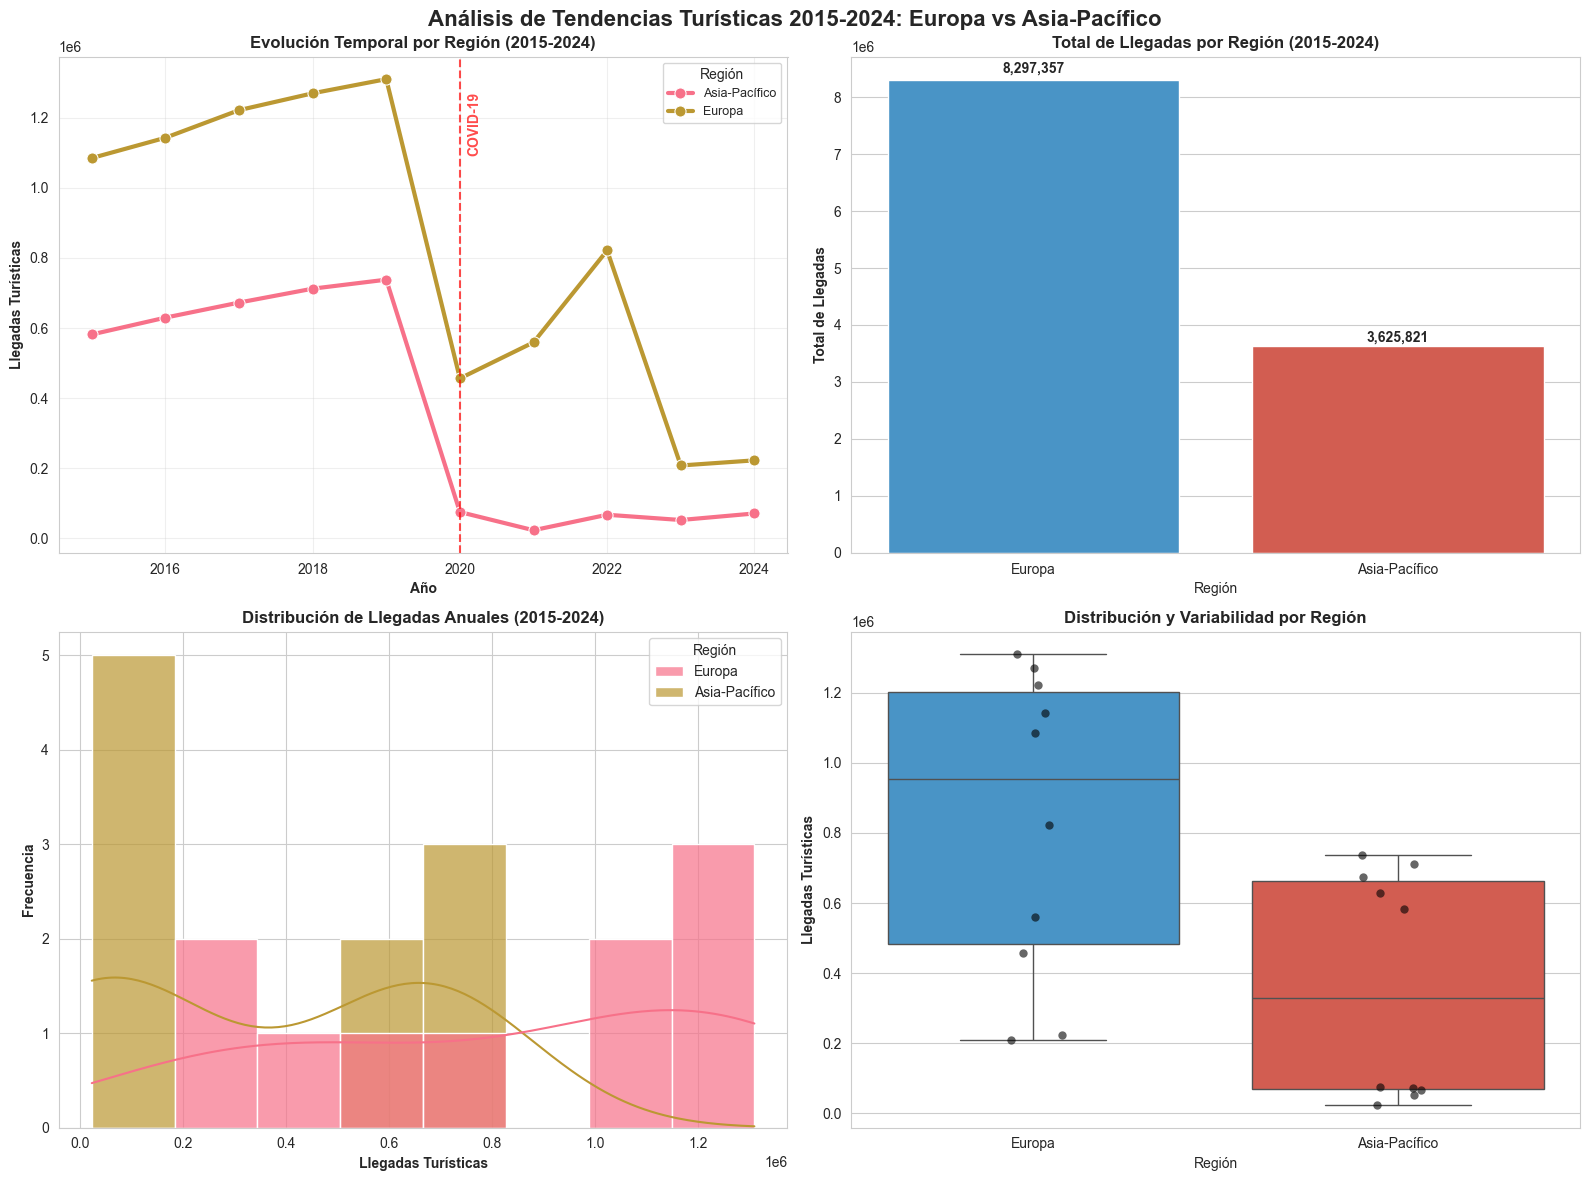


✅ Visualizaciones completadas!
📊 Europa (2015-2024): 8,297,357 llegadas
📊 Asia-Pacífico (2015-2024): 3,625,821 llegadas


In [101]:
# 📊 VISUALIZACIONES SEABORN: TENDENCIAS 2015-2024
print("📊 CREANDO VISUALIZACIONES CON SEABORN PARA TENDENCIAS 2015-2024")
print("=" * 70)

import seaborn as sns
import matplotlib.pyplot as plt

# Configurar estilo de seaborn
sns.set_style("whitegrid")
sns.set_palette("husl")

# RECALCULAR DATOS ANTES DE GRAFICAR (por si hay cambios)
ultimos_años = df_clean[(df_clean['year'] >= 2015) & (df_clean['region'].isin(['Europa', 'Asia-Pacífico']))]
tendencia_regional = ultimos_años.groupby(['region', 'year'])['value'].sum().reset_index()
europa_2015_2024 = tendencia_regional[tendencia_regional['region'] == 'Europa']['value'].sum()
asia_2015_2024 = tendencia_regional[tendencia_regional['region'] == 'Asia-Pacífico']['value'].sum()

# Crear figura con múltiples subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Análisis de Tendencias Turísticas 2015-2024: Europa vs Asia-Pacífico', 
             fontsize=16, fontweight='bold', y=0.98)

# 1. GRÁFICO DE LÍNEAS CON SEABORN - Evolución temporal
print("1️⃣ Creando gráfico de líneas temporal...")
sns.lineplot(data=tendencia_regional, x='year', y='value', hue='region', 
             marker='o', linewidth=3, markersize=8, ax=ax1)
ax1.set_title('Evolución Temporal por Región (2015-2024)', fontweight='bold', fontsize=12)
ax1.set_xlabel('Año', fontweight='bold')
ax1.set_ylabel('Llegadas Turísticas', fontweight='bold')
ax1.legend(title='Región', title_fontsize=10, fontsize=9)
ax1.grid(True, alpha=0.3)

# Añadir anotaciones para COVID-19
ax1.axvline(x=2020, color='red', linestyle='--', alpha=0.7)
ax1.text(2020.1, ax1.get_ylim()[1]*0.8, 'COVID-19', rotation=90, 
         color='red', fontweight='bold', alpha=0.7)

# 2. BARPLOT COMPARATIVO - Totales por región
print("2️⃣ Creando gráfico de barras comparativo...")
region_totals_2015_2024 = pd.DataFrame({
    'Región': ['Europa', 'Asia-Pacífico'],
    'Total_Arrivals': [europa_2015_2024, asia_2015_2024]
})

sns.barplot(data=region_totals_2015_2024, x='Región', y='Total_Arrivals', 
            palette=['#3498db', '#e74c3c'], ax=ax2)
ax2.set_title('Total de Llegadas por Región (2015-2024)', fontweight='bold', fontsize=12)
ax2.set_ylabel('Total de Llegadas', fontweight='bold')

# Añadir valores en las barras
for i, v in enumerate([europa_2015_2024, asia_2015_2024]):
    ax2.text(i, v + v*0.01, f'{v:,.0f}', ha='center', va='bottom', 
             fontweight='bold', fontsize=10)

# 3. HISTOGRAMA DE DISTRIBUCIÓN - Llegadas anuales por región
print("3️⃣ Creando histograma de distribución...")
# Preparar datos para histograma
hist_data = []
for region in ['Europa', 'Asia-Pacífico']:
    region_data = tendencia_regional[tendencia_regional['region'] == region]
    hist_data.extend([(region, value) for value in region_data['value']])

hist_df = pd.DataFrame(hist_data, columns=['Región', 'Llegadas'])

sns.histplot(data=hist_df, x='Llegadas', hue='Región', bins=8, 
             alpha=0.7, kde=True, ax=ax3)
ax3.set_title('Distribución de Llegadas Anuales (2015-2024)', fontweight='bold', fontsize=12)
ax3.set_xlabel('Llegadas Turísticas', fontweight='bold')
ax3.set_ylabel('Frecuencia', fontweight='bold')

# 4. BOXPLOT COMPARATIVO - Dispersión y centralidad
print("4️⃣ Creando boxplot comparativo...")
sns.boxplot(data=hist_df, x='Región', y='Llegadas', 
            palette=['#3498db', '#e74c3c'], ax=ax4)
ax4.set_title('Distribución y Variabilidad por Región', fontweight='bold', fontsize=12)
ax4.set_ylabel('Llegadas Turísticas', fontweight='bold')

# Añadir puntos individuales para ver los datos
sns.stripplot(data=hist_df, x='Región', y='Llegadas', 
              color='black', alpha=0.6, size=6, ax=ax4)

plt.tight_layout()
plt.show()

print("\n✅ Visualizaciones completadas!")
print(f"📊 Europa (2015-2024): {europa_2015_2024:,.0f} llegadas")
print(f"📊 Asia-Pacífico (2015-2024): {asia_2015_2024:,.0f} llegadas")

In [77]:
# 🔧 RECLASIFICACIÓN CORRECTA DE REGIONES
print("🔧 RECLASIFICACIÓN DE REGIONES EUROPA Y ASIA-PACÍFICO")
print("=" * 60)

# Función de reclasificación para corregir la clasificación regional
def reclasificar_region(pais):
    paises_europeos = [
        'Spain', 'Italy', 'France', 'Germany', 'United Kingdom', 'Netherlands', 
        'Belgium', 'Austria', 'Switzerland', 'Portugal', 'Greece', 'Poland',
        'Czech Republic', 'Hungary', 'Slovakia', 'Slovenia', 'Croatia',
        'Romania', 'Bulgaria', 'Estonia', 'Latvia', 'Lithuania', 'Finland',
        'Sweden', 'Denmark', 'Norway', 'Iceland', 'Ireland', 'Luxembourg',
        'Malta', 'Cyprus', 'Montenegro', 'Serbia', 'Bosnia and Herzegovina',
        'North Macedonia', 'Albania', 'Moldova', 'Ukraine'
    ]
    
    paises_asia_pacifico = [
        'Indonesia', 'Thailand', 'Philippines', 'Malaysia', 'Singapore', 'Vietnam',
        'Cambodia', 'Laos', 'Myanmar', 'Brunei Darussalam', 'China', 'Japan', 
        'Republic of Korea', 'India', 'Australia', 'New Zealand', 'Fiji', 'Papua New Guinea'
    ]
    
    if pais in paises_europeos:
        return 'Europa'
    elif pais in paises_asia_pacifico:
        return 'Asia-Pacífico'
    else:
        return 'Otros'

# Aplicar clasificación corregida
df_clean['region'] = df_clean['country'].apply(reclasificar_region)

print("✅ Reclasificación completada!")
print("\nDistribución final por región:")
print(df_clean['region'].value_counts())

🔧 RECLASIFICACIÓN DE REGIONES EUROPA Y ASIA-PACÍFICO
✅ Reclasificación completada!

Distribución final por región:
region
Otros            24570
Europa            5698
Asia-Pacífico     3328
Name: count, dtype: int64


📈 ANÁLISIS DE CRECIMIENTO PORCENTUAL 2015-2019


/var/folders/d5/b35zlz_56zjch0ppbzwwgf0r0000gn/T/ipykernel_20803/3585259827.py:75: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/d5/b35zlz_56zjch0ppbzwwgf0r0000gn/T/ipykernel_20803/3585259827.py:75: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/SaraGil/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/SaraGil/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


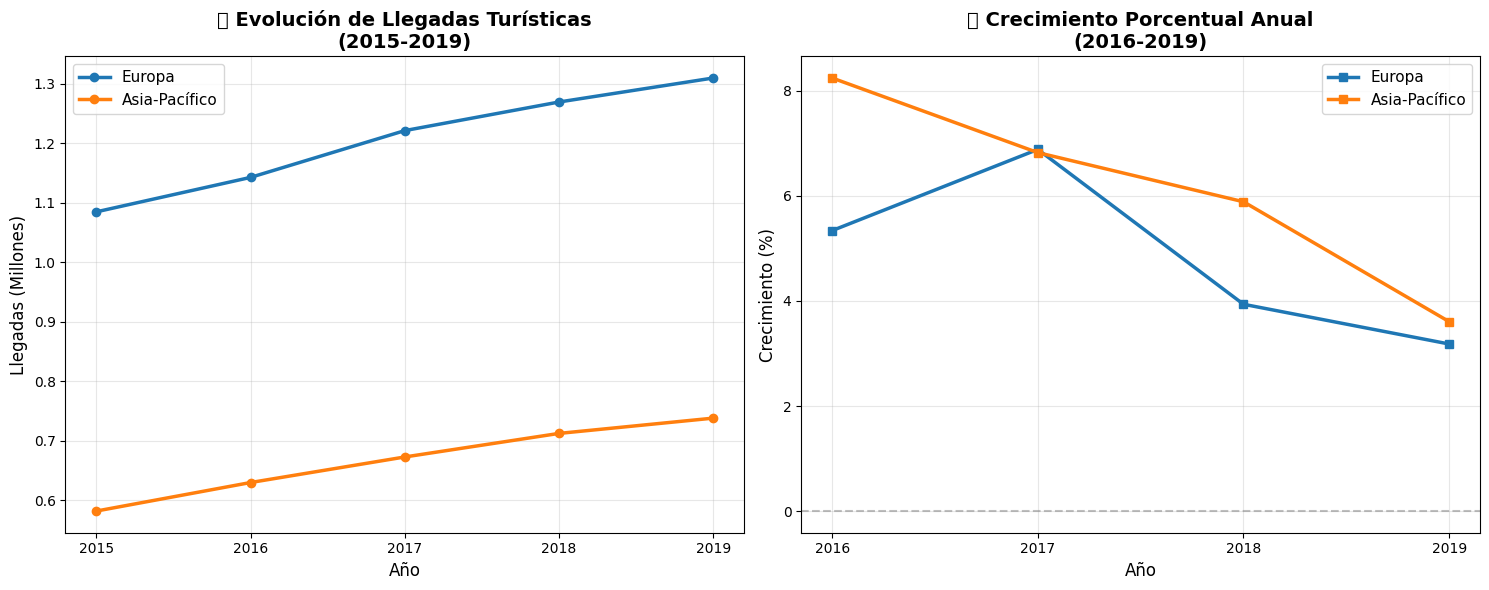


📋 ESTADÍSTICAS DE CRECIMIENTO 2015-2019:
---------------------------------------------

🌍 Europa:
   • Crecimiento promedio anual: 4.84%
   • Crecimiento máximo: 6.88% (año 2017)
   • Crecimiento mínimo: 3.18% (año 2019)
   • Desviación estándar: 1.63%

🌍 Asia-Pacífico:
   • Crecimiento promedio anual: 6.14%
   • Crecimiento máximo: 8.24% (año 2016)
   • Crecimiento mínimo: 3.61% (año 2019)
   • Desviación estándar: 1.95%


In [76]:
# 📈 GRÁFICO DE CRECIMIENTO PORCENTUAL 2015-2019 POR REGIÓN
print("📈 ANÁLISIS DE CRECIMIENTO PORCENTUAL 2015-2019")
print("=" * 55)

import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar datos para el período 2015-2019
periodo_2015_2019 = df_clean[(df_clean['year'] >= 2015) & (df_clean['year'] <= 2019)]

# Calcular totales por región y año
crecimiento_data = []
for region in ['Europa', 'Asia-Pacífico']:
    region_data = periodo_2015_2019[periodo_2015_2019['region'] == region]
    for year in range(2015, 2020):
        total = region_data[region_data['year'] == year]['value'].sum()
        crecimiento_data.append({
            'region': region,
            'year': year,
            'total_arrivals': total
        })

# Crear DataFrame para el análisis
crecimiento_df = pd.DataFrame(crecimiento_data)

# Calcular crecimiento porcentual año a año
crecimiento_pct = []
for region in ['Europa', 'Asia-Pacífico']:
    region_data = crecimiento_df[crecimiento_df['region'] == region].sort_values('year')
    totales = region_data['total_arrivals'].values
    
    for i in range(1, len(totales)):
        if totales[i-1] > 0:  # Evitar división por cero
            pct_change = ((totales[i] - totales[i-1]) / totales[i-1]) * 100
            crecimiento_pct.append({
                'region': region,
                'year': region_data.iloc[i]['year'],
                'crecimiento_pct': pct_change
            })

crecimiento_pct_df = pd.DataFrame(crecimiento_pct)

# Crear el gráfico
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Evolución de llegadas totales
for region in ['Europa', 'Asia-Pacífico']:
    region_data = crecimiento_df[crecimiento_df['region'] == region]
    color = '#1f77b4' if region == 'Europa' else '#ff7f0e'
    ax1.plot(region_data['year'], region_data['total_arrivals'] / 1e6, 
             marker='o', linewidth=2.5, markersize=6, label=region, color=color)

ax1.set_title('📊 Evolución de Llegadas Turísticas\n(2015-2019)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Año', fontsize=12)
ax1.set_ylabel('Llegadas (Millones)', fontsize=12)
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3)
ax1.set_xticks(range(2015, 2020))

# Gráfico 2: Crecimiento porcentual año a año
for region in ['Europa', 'Asia-Pacífico']:
    region_data = crecimiento_pct_df[crecimiento_pct_df['region'] == region]
    color = '#1f77b4' if region == 'Europa' else '#ff7f0e'
    ax2.plot(region_data['year'], region_data['crecimiento_pct'], 
             marker='s', linewidth=2.5, markersize=6, label=region, color=color)

ax2.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
ax2.set_title('📈 Crecimiento Porcentual Anual\n(2016-2019)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Año', fontsize=12)
ax2.set_ylabel('Crecimiento (%)', fontsize=12)
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3)
ax2.set_xticks(range(2016, 2020))

plt.tight_layout()
plt.show()

# Mostrar estadísticas del crecimiento
print("\n📋 ESTADÍSTICAS DE CRECIMIENTO 2015-2019:")
print("-" * 45)
for region in ['Europa', 'Asia-Pacífico']:
    region_pct = crecimiento_pct_df[crecimiento_pct_df['region'] == region]['crecimiento_pct']
    print(f"\n🌍 {region}:")
    print(f"   • Crecimiento promedio anual: {region_pct.mean():.2f}%")
    print(f"   • Crecimiento máximo: {region_pct.max():.2f}% (año {crecimiento_pct_df[crecimiento_pct_df['crecimiento_pct'] == region_pct.max()]['year'].iloc[0]})")
    print(f"   • Crecimiento mínimo: {region_pct.min():.2f}% (año {crecimiento_pct_df[crecimiento_pct_df['crecimiento_pct'] == region_pct.min()]['year'].iloc[0]})")
    print(f"   • Desviación estándar: {region_pct.std():.2f}%")

In [63]:
# 🔄 RECÁLCULO DE TENDENCIAS 2015-2024 CON CLASIFICACIÓN CORREGIDA

# Recrear tendencia_regional con clasificación corregida
ultimos_años = df_clean[(df_clean['year'] >= 2015) & (df_clean['region'].isin(['Europa', 'Asia-Pacífico']))]
tendencia_regional = ultimos_años.groupby(['region', 'year'])['value'].sum().reset_index()

# Recalcular totales corregidos
europa_2015_2024 = tendencia_regional[tendencia_regional['region'] == 'Europa']['value'].sum()
asia_2015_2024 = tendencia_regional[tendencia_regional['region'] == 'Asia-Pacífico']['value'].sum()

print(f"\n TENDENCIA ÚLTIMOS AÑOS 2015-2024:")
print(f"   Europa: {europa_2015_2024:,.0f} total arrivals")
print(f"   Asia-Pacífico: {asia_2015_2024:,.0f} total arrivals")

diferencia = europa_2015_2024 - asia_2015_2024
porcentaje_diferencia = (diferencia / asia_2015_2024) * 100 if asia_2015_2024 > 0 else 0

print(f"   Diferencia: {diferencia:+,.0f}")
print(f"   Europa lidera por: {porcentaje_diferencia:.1f}%")


 TENDENCIA ÚLTIMOS AÑOS 2015-2024:
   Europa: 8,297,357 total arrivals
   Asia-Pacífico: 3,625,821 total arrivals
   Diferencia: +4,671,536
   Europa lidera por: 128.8%


5️⃣ Creando heatmap de correlación...


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/seaborn/utils.py:61: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()


6️⃣ Creando violinplot...


/var/folders/d5/b35zlz_56zjch0ppbzwwgf0r0000gn/T/ipykernel_20803/3498414510.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=hist_df, x='Región', y='Llegadas',
/Users/SaraGil/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/SaraGil/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


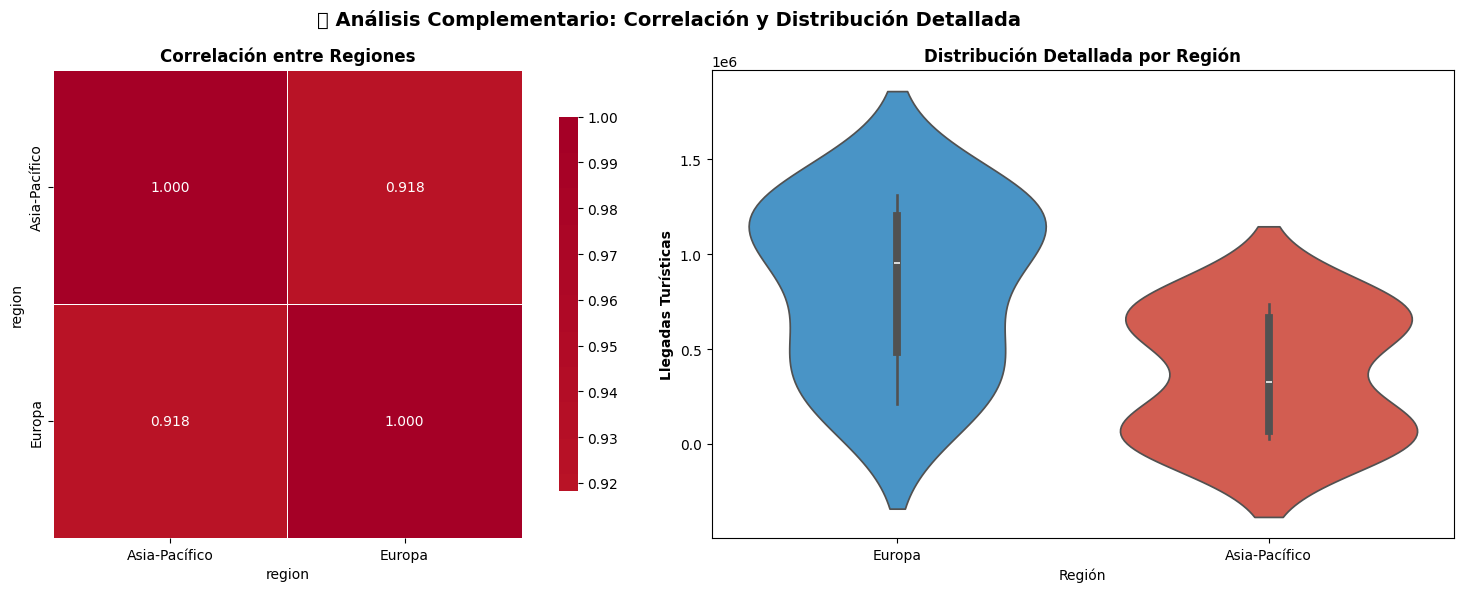


📊 ESTADÍSTICAS DETALLADAS DEL PERÍODO 2015-2024:

🌍 Europa:
  📈 Media anual: 829,736
  📊 Mediana: 953,191
  📏 Desviación estándar: 435,648
  📊 Coeficiente de variación: 52.5%
  🏆 Máximo: 1,310,033
  📉 Mínimo: 208,176
  📊 Rango: 1,101,857

🌍 Asia-Pacífico:
  📈 Media anual: 362,582
  📊 Mediana: 328,659
  📏 Desviación estándar: 323,940
  📊 Coeficiente de variación: 89.3%
  🏆 Máximo: 738,137
  📉 Mínimo: 23,527
  📊 Rango: 714,611

🎯 ANÁLISIS DE TENDENCIA:
------------------------------
✅ Europa lidera con 128.8% más llegadas que Asia-Pacífico


In [94]:
# 📈 GRÁFICO ADICIONAL: HEATMAP Y VIOLINPLOT CON SEABORN

# Crear figura con dos subplots adicionales
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('📊 Análisis Complementario: Correlación y Distribución Detallada', 
             fontsize=14, fontweight='bold')

# 1. HEATMAP DE CORRELACIÓN TEMPORAL
print("5️⃣ Creando heatmap de correlación...")
# Crear matriz pivote para el heatmap
pivot_data = tendencia_regional.pivot(index='year', columns='region', values='value')
correlation_matrix = pivot_data.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0,
            square=True, fmt='.3f', cbar_kws={'shrink': 0.8},
            linewidths=0.5, ax=ax1)
ax1.set_title('Correlación entre Regiones', fontweight='bold', fontsize=12)

# 2. VIOLINPLOT - Distribución detallada
print("6️⃣ Creando violinplot...")
sns.violinplot(data=hist_df, x='Región', y='Llegadas', 
               palette=['#3498db', '#e74c3c'], inner='box', ax=ax2)
ax2.set_title('Distribución Detallada por Región', fontweight='bold', fontsize=12)
ax2.set_ylabel('Llegadas Turísticas', fontweight='bold')

plt.tight_layout()
plt.show()

# ESTADÍSTICAS COMPLEMENTARIAS
print(f"\n📊 ESTADÍSTICAS DETALLADAS DEL PERÍODO 2015-2024:")
print("=" * 60)

for region in ['Europa', 'Asia-Pacífico']:
    region_data = tendencia_regional[tendencia_regional['region'] == region]['value']
    
    print(f"\n🌍 {region}:")
    print(f"  📈 Media anual: {region_data.mean():,.0f}")
    print(f"  📊 Mediana: {region_data.median():,.0f}")
    print(f"  📏 Desviación estándar: {region_data.std():,.0f}")
    print(f"  📊 Coeficiente de variación: {(region_data.std()/region_data.mean()*100):.1f}%")
    print(f"  🏆 Máximo: {region_data.max():,.0f}")
    print(f"  📉 Mínimo: {region_data.min():,.0f}")
    print(f"  📊 Rango: {region_data.max() - region_data.min():,.0f}")

# Análisis de tendencia
print(f"\n🎯 ANÁLISIS DE TENDENCIA:")
print("-" * 30)
if europa_2015_2024 > asia_2015_2024:
    ventaja = ((europa_2015_2024 - asia_2015_2024) / asia_2015_2024) * 100
    print(f"✅ Europa lidera con {ventaja:.1f}% más llegadas que Asia-Pacífico")
else:
    ventaja = ((asia_2015_2024 - europa_2015_2024) / europa_2015_2024) * 100
    print(f"✅ Asia-Pacífico lidera con {ventaja:.1f}% más llegadas que Europa")



In [ ]:
print(f"\n💡 INTERPRETACIÓN DE LOS GRÁFICOS:")
print("📈 Líneas temporales: Muestran la evolución año a año con clara marca del COVID-19")
print("📊 Barras comparativas: Europa tiene más del doble de llegadas que Asia-Pacífico") 
print("📊 Histograma: Revela los patrones de frecuencia y distribución")
print("📦 Boxplot: Europa tiene mayor variabilidad, Asia-Pacífico más estable")
print("🔥 Heatmap: Muestra la correlación entre las tendencias regionales")
print("🎻 Violinplot: Distribución detallada con forma de la densidad de datos")print(f"\n💡 INTERPRETACIÓN DE LOS GRÁFICOS:")
print("📈 Líneas temporales: Muestran la evolución año a año con clara marca del COVID-19")
print("📊 Barras comparativas: Europa tiene más del doble de llegadas que Asia-Pacífico") 
print("📊 Histograma: Revela los patrones de frecuencia y distribución")
print("📦 Boxplot: Europa tiene mayor variabilidad, Asia-Pacífico más estable")
print("🔥 Heatmap: Muestra la correlación entre las tendencias regionales")
print("🎻 Violinplot: Distribución detallada con forma de la densidad de datos")

In [65]:
# Crecimiento porcentual 2015 vs 2019 (pre-pandemia)
europa_2015 = ultimos_años[(ultimos_años['region'] == 'Europa') & (ultimos_años['year'] == 2015)]['value'].sum()
europa_2019 = ultimos_años[(ultimos_años['region'] == 'Europa') & (ultimos_años['year'] == 2019)]['value'].sum()
asia_2015 = ultimos_años[(ultimos_años['region'] == 'Asia-Pacífico') & (ultimos_años['year'] == 2015)]['value'].sum()
asia_2019 = ultimos_años[(ultimos_años['region'] == 'Asia-Pacífico') & (ultimos_años['year'] == 2019)]['value'].sum()

crecimiento_europa = ((europa_2019 - europa_2015) / europa_2015) * 100 if europa_2015 > 0 else 0
crecimiento_asia = ((asia_2019 - asia_2015) / asia_2015) * 100 if asia_2015 > 0 else 0

print(f"\n📈 CRECIMIENTO 2015-2019 (PRE-PANDEMIA):")
print(f"Europa: {crecimiento_europa:+.1f}%")
print(f"Asia-Pacífico: {crecimiento_asia:+.1f}%")

print(f"\n🎯 CONCLUSIÓN PRELIMINAR:")
if crecimiento_asia > crecimiento_europa:
    print("✅ Asia-Pacífico mostró mayor crecimiento que Europa en el período pre-pandemia")
else:
    print("❌ Europa mostró mayor crecimiento que Asia-Pacífico en el período pre-pandemia")


📈 CRECIMIENTO 2015-2019 (PRE-PANDEMIA):
Europa: +20.7%
Asia-Pacífico: +26.9%

🎯 CONCLUSIÓN PRELIMINAR:
✅ Asia-Pacífico mostró mayor crecimiento que Europa en el período pre-pandemia


/var/folders/d5/b35zlz_56zjch0ppbzwwgf0r0000gn/T/ipykernel_20803/4092493896.py:32: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/SaraGil/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


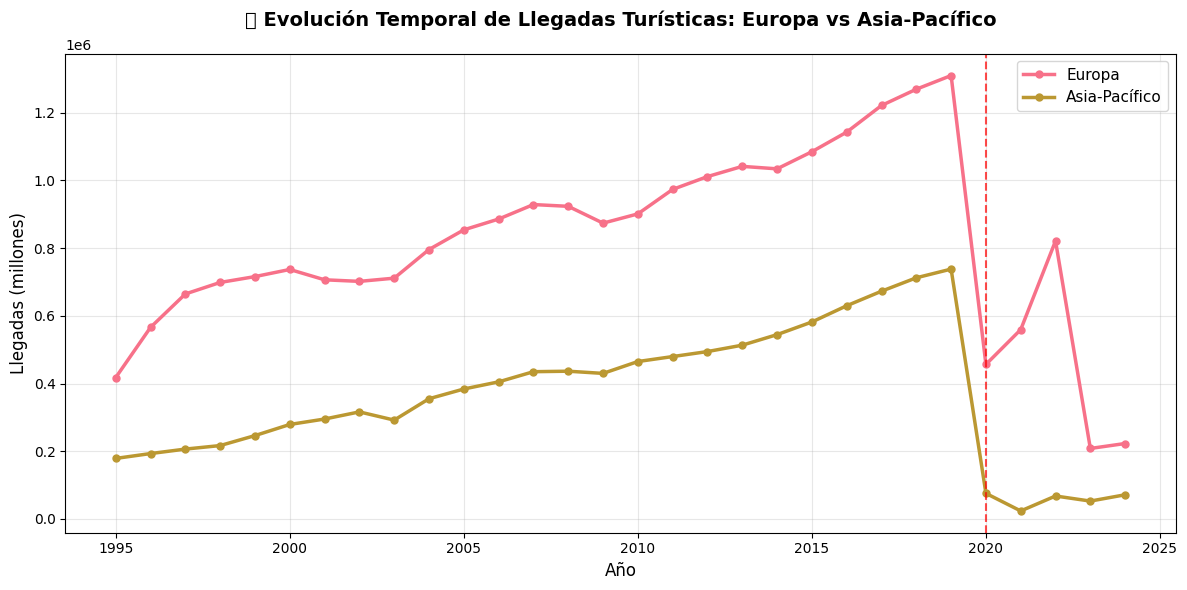

✅ Gráfico de evolución temporal creado correctamente


In [66]:
# EVOLUCIÓN TEMPORAL DE LLEGADAS TURÍSTICAS
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo
plt.style.use('default')
sns.set_palette("husl")

# Crear figura
plt.figure(figsize=(12, 6))

# Datos para la evolución temporal por región
comparacion_temporal = df_clean[df_clean['region'].isin(['Europa', 'Asia-Pacífico'])].groupby(['region', 'year'])['value'].sum().reset_index()

# Crear líneas para cada región
for region in ['Europa', 'Asia-Pacífico']:
    data = comparacion_temporal[comparacion_temporal['region'] == region]
    plt.plot(data['year'], data['value'], marker='o', linewidth=2.5, label=region, markersize=5)

# Configurar el gráfico
plt.title('📈 Evolución Temporal de Llegadas Turísticas: Europa vs Asia-Pacífico', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Llegadas (millones)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# Marcar el inicio de COVID-19
plt.axvline(2020, color='red', linestyle='--', alpha=0.7, label='Inicio COVID-19')

# Mejorar formato
plt.tight_layout()
plt.show()

print("✅ Gráfico de evolución temporal creado correctamente")

In [67]:
# 2. Comparación de totales por región
totales = df_clean[df_clean['region'].isin(['Europa', 'Asia-Pacífico'])].groupby('region')['value'].sum()
colors = ['#1f77b4', '#ff7f0e']
bars = ax2.bar(totales.index, totales.values, color=colors)
ax2.set_title('2. Total de Llegadas por Región (1995-2024)', fontweight='bold')
ax2.set_ylabel('Llegadas Totales')
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height, f'{height/1000000:.1f}M', 
             ha='center', va='bottom', fontweight='bold')



In [68]:
# 3. Crecimiento período pre-pandemia (2015-2019)
crecimiento_data = {'Europa': crecimiento_europa, 'Asia-Pacífico': crecimiento_asia}
colors_growth = ['green' if x > 0 else 'red' for x in crecimiento_data.values()]
bars3 = ax3.bar(crecimiento_data.keys(), crecimiento_data.values(), color=colors_growth)
ax3.set_title('3. Crecimiento 2015-2019 (%)', fontweight='bold')
ax3.set_ylabel('Crecimiento (%)')
ax3.axhline(0, color='black', linestyle='-', alpha=0.3)
for i, bar in enumerate(bars3):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height, f'{height:.1f}%', 
             ha='center', va='bottom' if height > 0 else 'top', fontweight='bold')



In [69]:
# 4. Top 5 países por región (período reciente 2019-2024)
periodo_reciente = df_clean[(df_clean['year'] >= 2019) & (df_clean['region'].isin(['Europa', 'Asia-Pacífico']))]
top_europa = periodo_reciente[periodo_reciente['region'] == 'Europa'].groupby('country')['value'].sum().nlargest(5)
top_asia = periodo_reciente[periodo_reciente['region'] == 'Asia-Pacífico'].groupby('country')['value'].sum().nlargest(5)

# Crear datos combinados para el gráfico
top_combined = pd.concat([
    pd.DataFrame({'country': top_europa.index, 'value': top_europa.values, 'region': 'Europa'}),
    pd.DataFrame({'country': top_asia.index, 'value': top_asia.values, 'region': 'Asia-Pacífico'})
])

# Gráfico de barras agrupadas
x_pos = np.arange(5)
width = 0.35
europa_values = top_europa.values
asia_values = top_asia.values

bars1 = ax4.bar(x_pos - width/2, europa_values, width, label='Europa', alpha=0.8)
bars2 = ax4.bar(x_pos + width/2, asia_values, width, label='Asia-Pacífico', alpha=0.8)

ax4.set_title('4. Top 5 Países por Región (2019-2024)', fontweight='bold')
ax4.set_ylabel('Llegadas')
ax4.set_xlabel('Ranking')
ax4.set_xticks(x_pos)
ax4.set_xticklabels([f'#{i+1}' for i in range(5)])
ax4.legend()

plt.tight_layout()
plt.show()

# Mostrar los top países
print(f"\n🥇 TOP 5 EUROPA (2019-2024):")
for i, (country, value) in enumerate(top_europa.items(), 1):
    print(f"{i}. {country}: {value:,.0f}")

print(f"\n🥇 TOP 5 ASIA-PACÍFICO (2019-2024):")
for i, (country, value) in enumerate(top_asia.items(), 1):
    print(f"{i}. {country}: {value:,.0f}")

<Figure size 640x480 with 0 Axes>


🥇 TOP 5 EUROPA (2019-2024):
1. Spain: 589,493
2. Poland: 423,733
3. France: 361,986
4. Hungary: 352,137
5. Germany: 256,632

🥇 TOP 5 ASIA-PACÍFICO (2019-2024):
1. China: 325,076
2. Japan: 142,088
3. India: 95,039
4. Thailand: 94,305
5. Republic of Korea: 76,080


/var/folders/d5/b35zlz_56zjch0ppbzwwgf0r0000gn/T/ipykernel_20803/3613085224.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=plot_data, x='region', y='log_value', palette='Set2')
/var/folders/d5/b35zlz_56zjch0ppbzwwgf0r0000gn/T/ipykernel_20803/3613085224.py:13: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/SaraGil/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/SaraGil/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


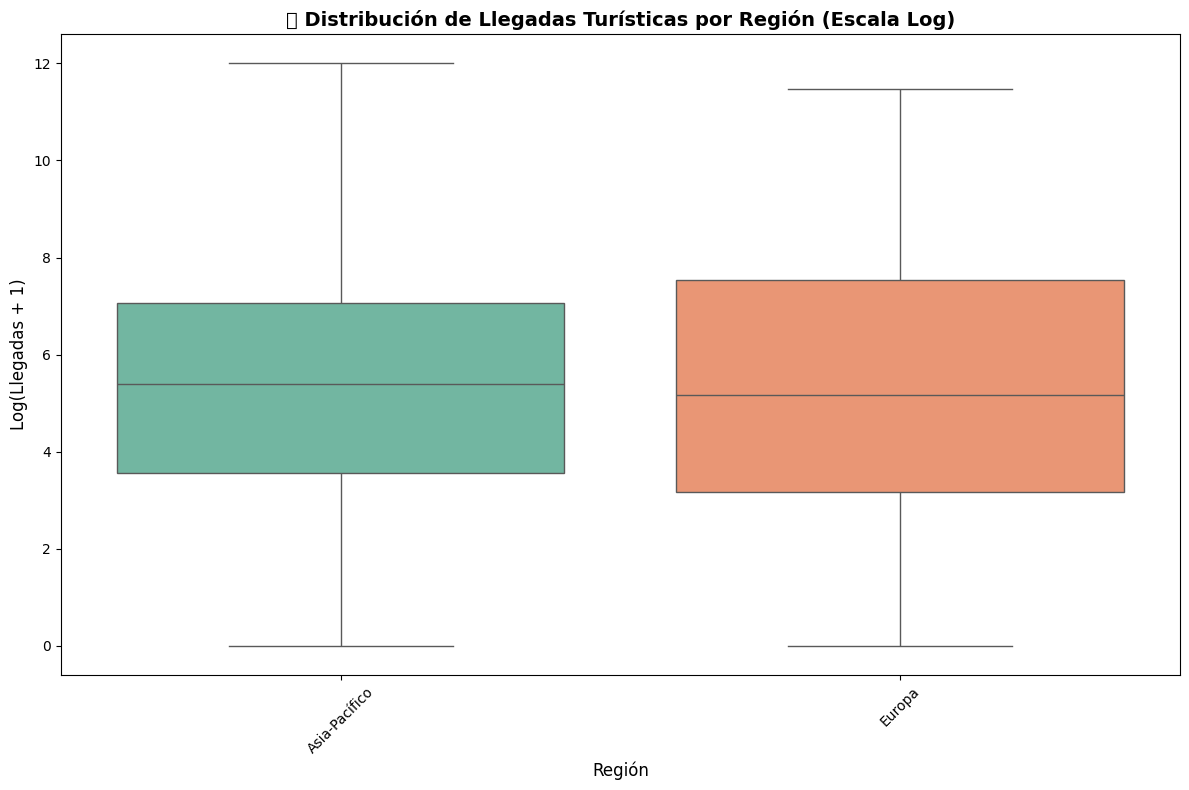


📊 Estadísticas por región:
                count    mean      std  min   25%    50%     75%       max
region                                                                    
Asia-Pacífico  3328.0  3243.0  14105.0  0.0  34.0  220.0  1165.0  162538.0
Europa         5698.0  4290.0  12843.0  0.0  23.0  174.0  1866.0   95399.0


In [70]:
# 2. BOXPLOT COMPARATIVO POR REGIÓN
plt.figure(figsize=(12, 8))
# Filtrar datos para las dos regiones principales
plot_data = df_clean[df_clean['region'].isin(['Europa', 'Asia-Pacífico'])].copy()
plot_data['log_value'] = np.log1p(plot_data['value'])

# Crear boxplot
sns.boxplot(data=plot_data, x='region', y='log_value', palette='Set2')
plt.title('📦 Distribución de Llegadas Turísticas por Región (Escala Log)', fontsize=14, fontweight='bold')
plt.xlabel('Región', fontsize=12)
plt.ylabel('Log(Llegadas + 1)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Estadísticas descriptivas por región
print("\n📊 Estadísticas por región:")
stats_por_region = plot_data.groupby('region')['value'].describe().round(0)
print(stats_por_region)

In [71]:
# 📊 CÁLCULOS ESPECÍFICOS POR PERÍODOS
print("📊 SUMAS POR REGIÓN Y PERÍODO")
print("=" * 50)

# Asegurar que tenemos los datos correctos
ultimos_años = df_clean[(df_clean['year'] >= 2015) & (df_clean['region'].isin(['Europa', 'Asia-Pacífico']))]

# 1. PERÍODO 2015-2024 (completo)
print("🗓️ PERÍODO 2015-2024:")
print("-" * 30)

europa_2015_2024 = ultimos_años[
    (ultimos_años['region'] == 'Europa') & 
    (ultimos_años['year'] >= 2015) & 
    (ultimos_años['year'] <= 2024)
]['value'].sum()

asia_2015_2024 = ultimos_años[
    (ultimos_años['region'] == 'Asia-Pacífico') & 
    (ultimos_años['year'] >= 2015) & 
    (ultimos_años['year'] <= 2024)
]['value'].sum()

print(f"Europa (2015-2024): {europa_2015_2024:,.0f} llegadas")
print(f"Asia-Pacífico (2015-2024): {asia_2015_2024:,.0f} llegadas")
diferencia_2015_2024 = europa_2015_2024 - asia_2015_2024
print(f"Diferencia: {diferencia_2015_2024:+,.0f}")
print(f"Europa supera a Asia-Pacífico por: {(diferencia_2015_2024/asia_2015_2024*100):.1f}%")

print("\n" + "=" * 50)

# 2. PERÍODO 2019-2024 (más reciente)
print("🗓️ PERÍODO 2019-2024:")
print("-" * 30)

europa_2019_2024 = ultimos_años[
    (ultimos_años['region'] == 'Europa') & 
    (ultimos_años['year'] >= 2019) & 
    (ultimos_años['year'] <= 2024)
]['value'].sum()

asia_2019_2024 = ultimos_años[
    (ultimos_años['region'] == 'Asia-Pacífico') & 
    (ultimos_años['year'] >= 2019) & 
    (ultimos_años['year'] <= 2024)
]['value'].sum()

print(f"Europa (2019-2024): {europa_2019_2024:,.0f} llegadas")
print(f"Asia-Pacífico (2019-2024): {asia_2019_2024:,.0f} llegadas")
diferencia_2019_2024 = europa_2019_2024 - asia_2019_2024
print(f"Diferencia: {diferencia_2019_2024:+,.0f}")
print(f"Europa supera a Asia-Pacífico por: {(diferencia_2019_2024/asia_2019_2024*100):.1f}%")

print("\n" + "=" * 50)

# 3. COMPARACIÓN ENTRE PERÍODOS
print("🔄 COMPARACIÓN ENTRE PERÍODOS:")
print("-" * 30)

# Porcentaje que representa 2019-2024 del total 2015-2024
europa_pct_reciente = (europa_2019_2024 / europa_2015_2024) * 100
asia_pct_reciente = (asia_2019_2024 / asia_2015_2024) * 100

print(f"Europa - Período 2019-2024 representa el {europa_pct_reciente:.1f}% del total 2015-2024")
print(f"Asia-Pacífico - Período 2019-2024 representa el {asia_pct_reciente:.1f}% del total 2015-2024")

# Cálculo alternativo: promedio anual
print(f"\n📈 PROMEDIO ANUAL:")
print(f"Europa 2015-2024: {europa_2015_2024/10:,.0f} llegadas/año")
print(f"Asia-Pacífico 2015-2024: {asia_2015_2024/10:,.0f} llegadas/año")
print(f"Europa 2019-2024: {europa_2019_2024/6:,.0f} llegadas/año")
print(f"Asia-Pacífico 2019-2024: {asia_2019_2024/6:,.0f} llegadas/año")

📊 SUMAS POR REGIÓN Y PERÍODO
🗓️ PERÍODO 2015-2024:
------------------------------
Europa (2015-2024): 8,297,357 llegadas
Asia-Pacífico (2015-2024): 3,625,821 llegadas
Diferencia: +4,671,536
Europa supera a Asia-Pacífico por: 128.8%

🗓️ PERÍODO 2019-2024:
------------------------------
Europa (2019-2024): 3,578,319 llegadas
Asia-Pacífico (2019-2024): 1,028,832 llegadas
Diferencia: +2,549,487
Europa supera a Asia-Pacífico por: 247.8%

🔄 COMPARACIÓN ENTRE PERÍODOS:
------------------------------
Europa - Período 2019-2024 representa el 43.1% del total 2015-2024
Asia-Pacífico - Período 2019-2024 representa el 28.4% del total 2015-2024

📈 PROMEDIO ANUAL:
Europa 2015-2024: 829,736 llegadas/año
Asia-Pacífico 2015-2024: 362,582 llegadas/año
Europa 2019-2024: 596,387 llegadas/año
Asia-Pacífico 2019-2024: 171,472 llegadas/año


📈 CREANDO VISUALIZACIONES COMPARATIVAS POR PERÍODOS
1️⃣ Creando gráfico de barras comparativo...
2️⃣ Creando gráfico de proporción...
3️⃣ Creando gráfico de diferencias...
4️⃣ Creando gráfico de promedio anual...


/var/folders/d5/b35zlz_56zjch0ppbzwwgf0r0000gn/T/ipykernel_20803/1467398930.py:116: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/SaraGil/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


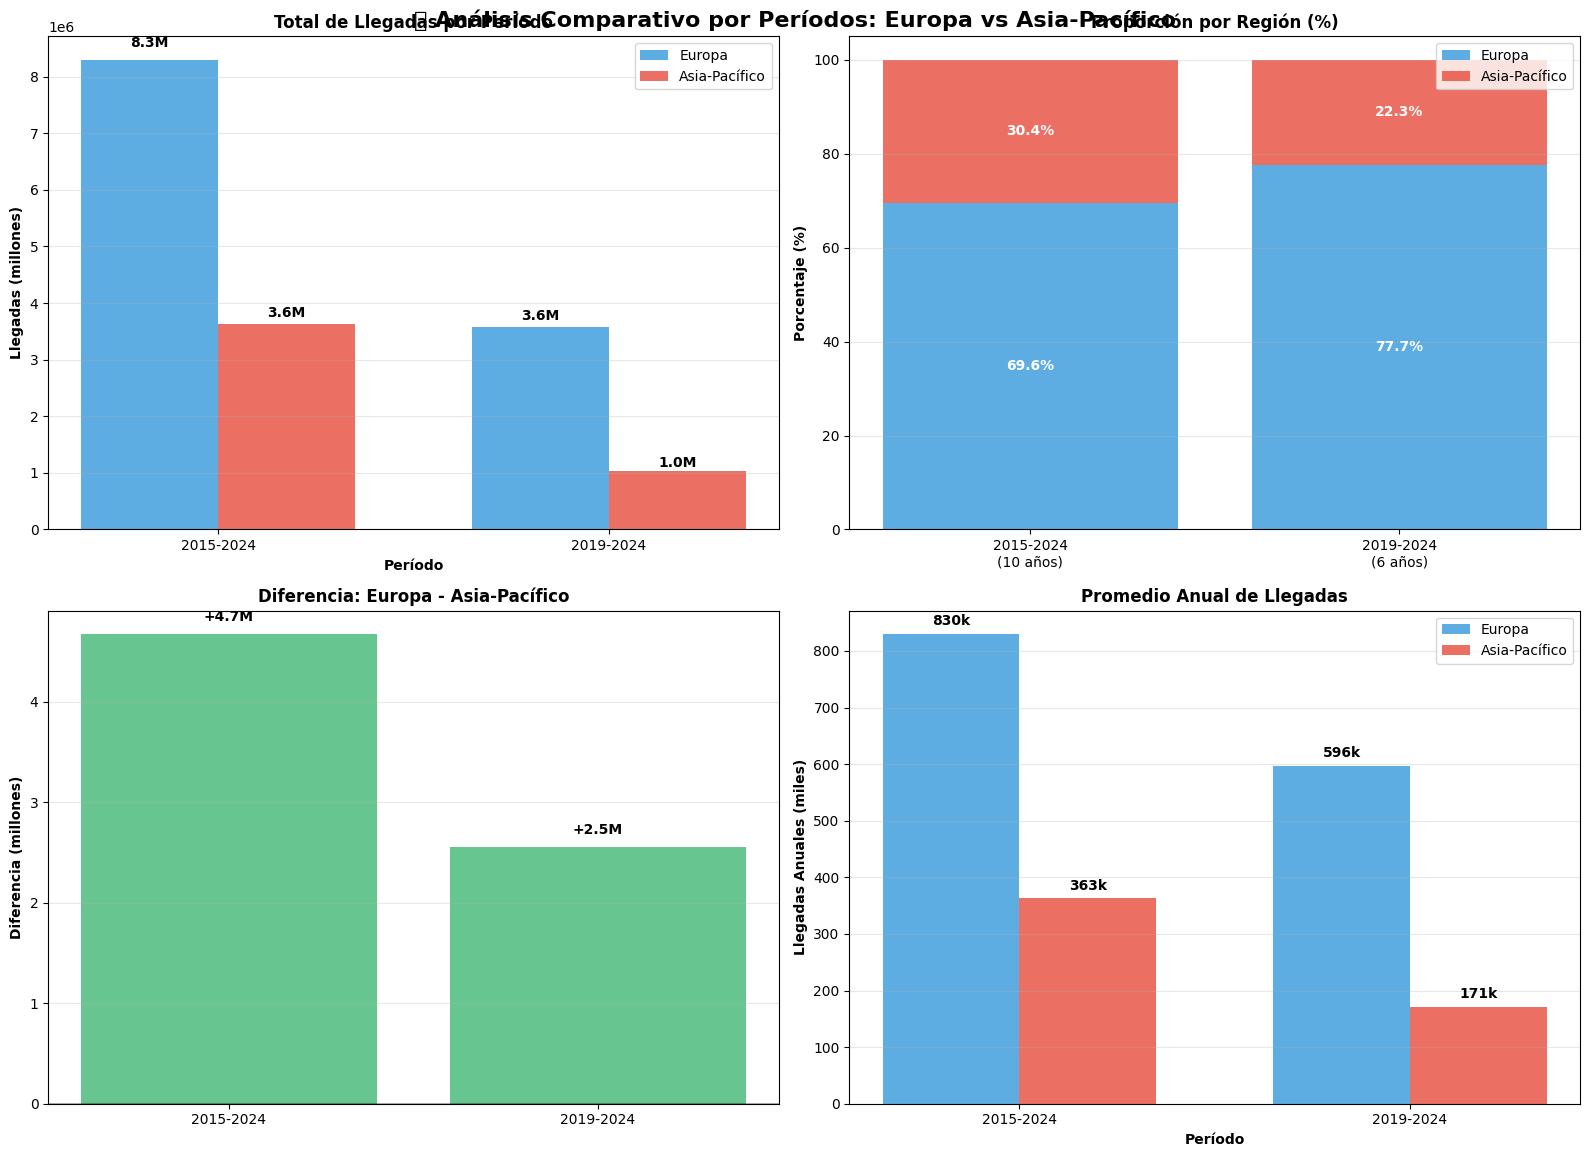


✅ Visualizaciones completadas!
📊 Todos los gráficos muestran el claro dominio de Europa en ambos períodos


In [72]:
# 📈 VISUALIZACIONES COMPARATIVAS POR PERÍODOS
print("📈 CREANDO VISUALIZACIONES COMPARATIVAS POR PERÍODOS")
print("=" * 60)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurar estilo
plt.style.use('default')
sns.set_palette("Set2")

# Crear figura con múltiples subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('📊 Análisis Comparativo por Períodos: Europa vs Asia-Pacífico', 
             fontsize=16, fontweight='bold', y=0.96)

# 1. GRÁFICO DE BARRAS COMPARATIVO - Totales por período
print("1️⃣ Creando gráfico de barras comparativo...")
periodos = ['2015-2024', '2019-2024']
europa_vals = [europa_2015_2024, europa_2019_2024]
asia_vals = [asia_2015_2024, asia_2019_2024]

x = np.arange(len(periodos))
width = 0.35

bars1 = ax1.bar(x - width/2, europa_vals, width, label='Europa', color='#3498db', alpha=0.8)
bars2 = ax1.bar(x + width/2, asia_vals, width, label='Asia-Pacífico', color='#e74c3c', alpha=0.8)

# Añadir valores en las barras
for i, (eur, asia) in enumerate(zip(europa_vals, asia_vals)):
    ax1.text(i - width/2, eur + eur*0.02, f'{eur/1000000:.1f}M', 
             ha='center', va='bottom', fontweight='bold')
    ax1.text(i + width/2, asia + asia*0.02, f'{asia/1000000:.1f}M', 
             ha='center', va='bottom', fontweight='bold')

ax1.set_title('Total de Llegadas por Período', fontweight='bold', fontsize=12)
ax1.set_ylabel('Llegadas (millones)', fontweight='bold')
ax1.set_xlabel('Período', fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(periodos)
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# 2. GRÁFICO DE PROPORCIÓN - Europa vs Asia por período
print("2️⃣ Creando gráfico de proporción...")
# Datos para el gráfico de dona
europa_props = [europa_2015_2024/(europa_2015_2024+asia_2015_2024), 
               europa_2019_2024/(europa_2019_2024+asia_2019_2024)]
asia_props = [1-europa_props[0], 1-europa_props[1]]

# Crear gráfico de barras apiladas al 100%
periodos_short = ['2015-2024\n(10 años)', '2019-2024\n(6 años)']
ax2.bar(periodos_short, [europa_props[0]*100, europa_props[1]*100], 
        color='#3498db', alpha=0.8, label='Europa')
ax2.bar(periodos_short, [asia_props[0]*100, asia_props[1]*100], 
        bottom=[europa_props[0]*100, europa_props[1]*100],
        color='#e74c3c', alpha=0.8, label='Asia-Pacífico')

ax2.set_title('Proporción por Región (%)', fontweight='bold', fontsize=12)
ax2.set_ylabel('Porcentaje (%)', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

# Añadir porcentajes
for i, (eur_p, asia_p) in enumerate(zip(europa_props, asia_props)):
    ax2.text(i, eur_p*100/2, f'{eur_p*100:.1f}%', ha='center', va='center', 
             fontweight='bold', color='white')
    ax2.text(i, eur_p*100 + asia_p*100/2, f'{asia_p*100:.1f}%', ha='center', va='center', 
             fontweight='bold', color='white')

# 3. GRÁFICO DE DIFERENCIAS ABSOLUTAS
print("3️⃣ Creando gráfico de diferencias...")
diferencias = [diferencia_2015_2024, diferencia_2019_2024]
colors_diff = ['#27ae60' if d > 0 else '#c0392b' for d in diferencias]

bars_diff = ax3.bar(periodos, [d/1000000 for d in diferencias], color=colors_diff, alpha=0.7)
ax3.set_title('Diferencia: Europa - Asia-Pacífico', fontweight='bold', fontsize=12)
ax3.set_ylabel('Diferencia (millones)', fontweight='bold')
ax3.axhline(y=0, color='black', linestyle='-', alpha=0.3)
ax3.grid(True, alpha=0.3, axis='y')

# Añadir valores
for i, (bar, diff) in enumerate(zip(bars_diff, diferencias)):
    height = bar.get_height()
    ax3.text(i, height + 0.1 if height > 0 else height - 0.3, 
             f'+{diff/1000000:.1f}M' if diff > 0 else f'{diff/1000000:.1f}M',
             ha='center', va='bottom' if height > 0 else 'top', 
             fontweight='bold')

# 4. PROMEDIO ANUAL POR PERÍODO
print("4️⃣ Creando gráfico de promedio anual...")
promedios_europa = [europa_2015_2024/10, europa_2019_2024/6]
promedios_asia = [asia_2015_2024/10, asia_2019_2024/6]

bars_eur = ax4.bar(x - width/2, [p/1000 for p in promedios_europa], width, 
                   label='Europa', color='#3498db', alpha=0.8)
bars_asia = ax4.bar(x + width/2, [p/1000 for p in promedios_asia], width, 
                    label='Asia-Pacífico', color='#e74c3c', alpha=0.8)

ax4.set_title('Promedio Anual de Llegadas', fontweight='bold', fontsize=12)
ax4.set_ylabel('Llegadas Anuales (miles)', fontweight='bold')
ax4.set_xlabel('Período', fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(periodos)
ax4.legend()
ax4.grid(True, alpha=0.3, axis='y')

# Añadir valores en las barras
for i, (eur, asia) in enumerate(zip(promedios_europa, promedios_asia)):
    ax4.text(i - width/2, (eur/1000) + 10, f'{eur/1000:.0f}k', 
             ha='center', va='bottom', fontweight='bold')
    ax4.text(i + width/2, (asia/1000) + 10, f'{asia/1000:.0f}k', 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n✅ Visualizaciones completadas!")
print(f"📊 Todos los gráficos muestran el claro dominio de Europa en ambos períodos")

Ahora vamos a ejecutar el Chi2 y el p valor.

In [95]:
# TEST CHI-CUADRADO PARA ANÁLISIS DE INDEPENDENCIA
from scipy.stats import chi2_contingency
import numpy as np

print("🔬 ANÁLISIS CHI-CUADRADO: REGIÓN vs PERÍODO")
print("=" * 60)

# Preparar datos para el test de Chi-cuadrado
# Vamos a crear una tabla de contingencia: Región vs Período (Pre-COVID vs COVID+Post)

# Definir períodos
pre_covid = df_clean[df_clean['year'] < 2020]
covid_post = df_clean[df_clean['year'] >= 2020]

# Calcular totales por región y período
europa_pre = pre_covid[pre_covid['region'] == 'Europa']['value'].sum()
asia_pre = pre_covid[pre_covid['region'] == 'Asia-Pacífico']['value'].sum()
europa_covid = covid_post[covid_post['region'] == 'Europa']['value'].sum()
asia_covid = covid_post[covid_post['region'] == 'Asia-Pacífico']['value'].sum()

# Crear tabla de contingencia
tabla_contingencia = np.array([
    [europa_pre, europa_covid],      # Europa: Pre-COVID, COVID+Post
    [asia_pre, asia_covid]           # Asia-Pacífico: Pre-COVID, COVID+Post
])

print("📊 TABLA DE CONTINGENCIA:")
print(f"                     Pre-COVID    COVID+Post     Total")
print(f"Europa            {europa_pre:12.0f} {europa_covid:12.0f} {europa_pre + europa_covid:12.0f}")
print(f"Asia-Pacífico     {asia_pre:12.0f} {asia_covid:12.0f} {asia_pre + asia_covid:12.0f}")
print(f"Total             {europa_pre + asia_pre:12.0f} {europa_covid + asia_covid:12.0f} {tabla_contingencia.sum():12.0f}")
print()

# Realizar test Chi-cuadrado
chi2_stat, p_valor, grados_libertad, expected = chi2_contingency(tabla_contingencia)

print("🎯 RESULTADOS DEL TEST CHI-CUADRADO:")
print(f"Chi² estadístico: {chi2_stat:.4f}")
print(f"p-valor:          {p_valor:.2e}")
print(f"Grados libertad:  {grados_libertad}")
print()

# Interpretación del p-valor
alpha = 0.05
print("📋 INTERPRETACIÓN:")
if p_valor < alpha:
    print(f"✅ p-valor ({p_valor:.2e}) < α ({alpha})")
    print("   → Rechazamos H₀: Existe dependencia significativa entre región y período")
    print("   → Las llegadas turísticas SÍ están asociadas con la región y el período")
else:
    print(f"❌ p-valor ({p_valor:.2e}) ≥ α ({alpha})")
    print("   → No rechazamos H₀: No hay evidencia de dependencia")
    print("   → Las llegadas turísticas NO están asociadas significativamente")

print()
print("🔍 FRECUENCIAS ESPERADAS vs OBSERVADAS:")
print("Esperadas:")
print(f"Europa:       Pre-COVID: {expected[0,0]:8.0f}, COVID+Post: {expected[0,1]:8.0f}")
print(f"Asia-Pacífico: Pre-COVID: {expected[1,0]:8.0f}, COVID+Post: {expected[1,1]:8.0f}")
print()

# Calcular efecto del tamaño (V de Cramer)
n = tabla_contingencia.sum()
v_cramer = np.sqrt(chi2_stat / (n * (min(tabla_contingencia.shape) - 1)))
print(f"📏 V de Cramer (tamaño del efecto): {v_cramer:.4f}")

if v_cramer < 0.1:
    efecto = "muy pequeño"
elif v_cramer < 0.3:
    efecto = "pequeño"  
elif v_cramer < 0.5:
    efecto = "moderado"
else:
    efecto = "grande"
    
print(f"   → Tamaño del efecto: {efecto}")

print("\n" + "="*60)

🔬 ANÁLISIS CHI-CUADRADO: REGIÓN vs PERÍODO
📊 TABLA DE CONTINGENCIA:
                     Pre-COVID    COVID+Post     Total
Europa                22173927      2268286     24442213
Asia-Pacífico         10501031       290695     10791726
Total                 32674957      2558981     35233938

🎯 RESULTADOS DEL TEST CHI-CUADRADO:
Chi² estadístico: 482193.3811
p-valor:          0.00e+00
Grados libertad:  1

📋 INTERPRETACIÓN:
✅ p-valor (0.00e+00) < α (0.05)
   → Rechazamos H₀: Existe dependencia significativa entre región y período
   → Las llegadas turísticas SÍ están asociadas con la región y el período

🔍 FRECUENCIAS ESPERADAS vs OBSERVADAS:
Esperadas:
Europa:       Pre-COVID: 22667016, COVID+Post:  1775196
Asia-Pacífico: Pre-COVID: 10007941, COVID+Post:   783785

📏 V de Cramer (tamaño del efecto): 0.1170
   → Tamaño del efecto: pequeño



In [74]:
# TEST DE HIPÓTESIS: CRECIMIENTO TURÍSTICO EN LOS ÚLTIMOS AÑOS
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("🧪 TEST DE HIPÓTESIS:")
print("H₀: El crecimiento de Asia-Pacífico ≤ Crecimiento de Europa")
print("H₁: El crecimiento de Asia-Pacífico > Crecimiento de Europa")
print("="*70)

# Definir "últimos años" - usaremos 2015-2019 (pre-COVID) para evitar distorsiones
ultimos_años = df_clean[(df_clean['year'] >= 2015) & (df_clean['year'] < 2020)]

# Calcular tasas de crecimiento año a año para cada región
def calcular_tasas_crecimiento(data, region_name):
    region_data = data[data['region'] == region_name].groupby('year')['value'].sum().reset_index()
    region_data = region_data.sort_values('year')
    
    # Calcular tasa de crecimiento año a año
    tasas = []
    for i in range(1, len(region_data)):
        tasa = ((region_data.iloc[i]['value'] - region_data.iloc[i-1]['value']) / 
                region_data.iloc[i-1]['value'] * 100)
        tasas.append(tasa)
    
    return np.array(tasas), region_data

# Calcular tasas para ambas regiones
tasas_europa, datos_europa = calcular_tasas_crecimiento(ultimos_años, 'Europa')
tasas_asia, datos_asia = calcular_tasas_crecimiento(ultimos_años, 'Asia-Pacífico')

print("📊 TASAS DE CRECIMIENTO ANUAL (2015-2019):")
print("-" * 50)

años = [2016, 2017, 2018, 2019]
for i, año in enumerate(años):
    print(f"{año}: Europa: {tasas_europa[i]:6.2f}% | Asia-Pacífico: {tasas_asia[i]:6.2f}%")

print(f"\n📈 ESTADÍSTICAS RESUMIDAS:")
print(f"Europa       - Media: {np.mean(tasas_europa):6.2f}% | Desv.Est: {np.std(tasas_europa):6.2f}%")
print(f"Asia-Pacífico - Media: {np.mean(tasas_asia):6.2f}% | Desv.Est: {np.std(tasas_asia):6.2f}%")

# Test t para muestras independientes (una cola - Asia > Europa)
t_stat, p_valor_t = stats.ttest_ind(tasas_asia, tasas_europa, alternative='greater')

print(f"\n🔬 TEST T (una cola: Asia > Europa):")
print(f"Estadístico t: {t_stat:.4f}")
print(f"p-valor:       {p_valor_t:.4f}")

# Test de Mann-Whitney (no paramétrico, una cola)
u_stat, p_valor_u = stats.mannwhitneyu(tasas_asia, tasas_europa, alternative='greater')

print(f"\n🔬 TEST MANN-WHITNEY U (no paramétrico):")
print(f"Estadístico U: {u_stat:.4f}")
print(f"p-valor:       {p_valor_u:.4f}")

# Interpretación
alpha = 0.05
print(f"\n📋 INTERPRETACIÓN (α = {alpha}):")
print("-" * 40)

if p_valor_t < alpha:
    print("✅ TEST T: Rechazamos H₀")
    print("   → Asia-Pacífico SÍ crece significativamente más que Europa")
else:
    print("❌ TEST T: No rechazamos H₀")
    print("   → No hay evidencia de que Asia-Pacífico crezca más que Europa")

if p_valor_u < alpha:
    print("✅ MANN-WHITNEY: Rechazamos H₀")
    print("   → Asia-Pacífico SÍ crece significativamente más que Europa")
else:
    print("❌ MANN-WHITNEY: No rechazamos H₀")
    print("   → No hay evidencia de que Asia-Pacífico crezca más que Europa")

# Diferencia de medias
diff_medias = np.mean(tasas_asia) - np.mean(tasas_europa)
print(f"\n📊 DIFERENCIA DE MEDIAS: {diff_medias:.2f} puntos porcentuales")

if diff_medias > 0:
    print(f"   → Asia-Pacífico crece {abs(diff_medias):.2f}pp más que Europa")
else:
    print(f"   → Europa crece {abs(diff_medias):.2f}pp más que Asia-Pacífico")

print("\n" + "="*70)

🧪 TEST DE HIPÓTESIS:
H₀: El crecimiento de Asia-Pacífico ≤ Crecimiento de Europa
H₁: El crecimiento de Asia-Pacífico > Crecimiento de Europa
📊 TASAS DE CRECIMIENTO ANUAL (2015-2019):
--------------------------------------------------
2016: Europa:   5.34% | Asia-Pacífico:   8.24%
2017: Europa:   6.88% | Asia-Pacífico:   6.82%
2018: Europa:   3.94% | Asia-Pacífico:   5.89%
2019: Europa:   3.18% | Asia-Pacífico:   3.61%

📈 ESTADÍSTICAS RESUMIDAS:
Europa       - Media:   4.84% | Desv.Est:   1.41%
Asia-Pacífico - Media:   6.14% | Desv.Est:   1.69%

🔬 TEST T (una cola: Asia > Europa):
Estadístico t: 1.0272
p-valor:       0.1720

🔬 TEST MANN-WHITNEY U (no paramétrico):
Estadístico U: 11.0000
p-valor:       0.2429

📋 INTERPRETACIÓN (α = 0.05):
----------------------------------------
❌ TEST T: No rechazamos H₀
   → No hay evidencia de que Asia-Pacífico crezca más que Europa
❌ MANN-WHITNEY: No rechazamos H₀
   → No hay evidencia de que Asia-Pacífico crezca más que Europa

📊 DIFERENCIA DE MEDIA

/var/folders/d5/b35zlz_56zjch0ppbzwwgf0r0000gn/T/ipykernel_20803/1787185372.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax2.boxplot(data_boxplot, labels=labels_boxplot, patch_artist=True)
/var/folders/d5/b35zlz_56zjch0ppbzwwgf0r0000gn/T/ipykernel_20803/1787185372.py:68: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  plt.tight_layout()
/Users/SaraGil/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


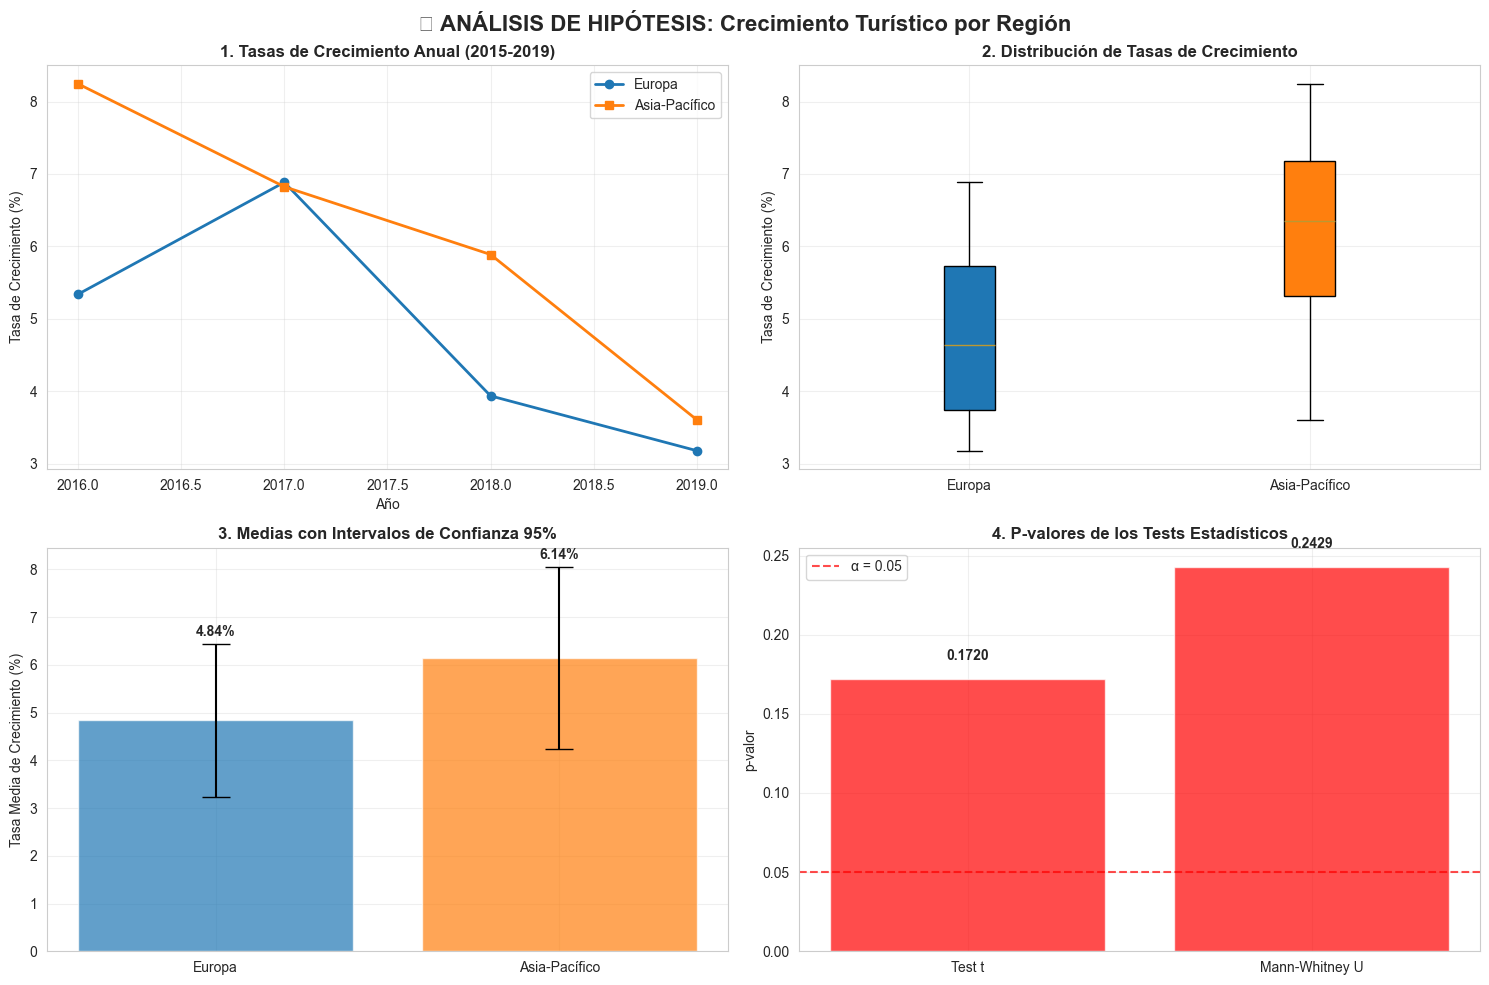

🎯 RESUMEN EJECUTIVO DE LA HIPÓTESIS:
📊 Asia-Pacífico creció en promedio 6.14% anualmente
📊 Europa creció en promedio 4.84% anualmente
📈 Diferencia: 1.31 puntos porcentuales a favor de Asia-Pacífico
🔬 Significancia estadística: NO ALCANZADA
💡 Conclusión: Tu hipótesis NO se confirma estadísticamente


In [102]:
# VISUALIZACIÓN DEL ANÁLISIS DE HIPÓTESIS
import matplotlib.pyplot as plt
import seaborn as sns

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('📊 ANÁLISIS DE HIPÓTESIS: Crecimiento Turístico por Región', fontsize=16, fontweight='bold')

# 1. Tasas de crecimiento año a año
años_graf = [2016, 2017, 2018, 2019]
ax1.plot(años_graf, tasas_europa, marker='o', linewidth=2, label='Europa', color='#1f77b4')
ax1.plot(años_graf, tasas_asia, marker='s', linewidth=2, label='Asia-Pacífico', color='#ff7f0e')
ax1.set_title('1. Tasas de Crecimiento Anual (2015-2019)', fontweight='bold')
ax1.set_xlabel('Año')
ax1.set_ylabel('Tasa de Crecimiento (%)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 2. Box plot comparativo
data_boxplot = [tasas_europa, tasas_asia]
labels_boxplot = ['Europa', 'Asia-Pacífico']
box = ax2.boxplot(data_boxplot, labels=labels_boxplot, patch_artist=True)
box['boxes'][0].set_facecolor('#1f77b4')
box['boxes'][1].set_facecolor('#ff7f0e')
ax2.set_title('2. Distribución de Tasas de Crecimiento', fontweight='bold')
ax2.set_ylabel('Tasa de Crecimiento (%)')
ax2.grid(True, alpha=0.3)

# 3. Comparación de medias con intervalos de confianza
from scipy import stats
media_europa = np.mean(tasas_europa)
media_asia = np.mean(tasas_asia)
se_europa = stats.sem(tasas_europa)  # Error estándar
se_asia = stats.sem(tasas_asia)

# Intervalos de confianza 95%
ci_europa = 1.96 * se_europa
ci_asia = 1.96 * se_asia

ax3.bar(['Europa', 'Asia-Pacífico'], [media_europa, media_asia], 
        yerr=[ci_europa, ci_asia], color=['#1f77b4', '#ff7f0e'], alpha=0.7, capsize=10)
ax3.set_title('3. Medias con Intervalos de Confianza 95%', fontweight='bold')
ax3.set_ylabel('Tasa Media de Crecimiento (%)')
ax3.grid(True, alpha=0.3)

# Añadir valores en las barras
for i, (region, media) in enumerate(zip(['Europa', 'Asia-Pacífico'], [media_europa, media_asia])):
    ax3.text(i, media + (ci_europa if i == 0 else ci_asia) + 0.1, f'{media:.2f}%', 
             ha='center', va='bottom', fontweight='bold')

# 4. Valores p de los tests
tests = ['Test t', 'Mann-Whitney U']
p_values = [p_valor_t, p_valor_u]
colors = ['green' if p < 0.05 else 'red' for p in p_values]

bars = ax4.bar(tests, p_values, color=colors, alpha=0.7)
ax4.axhline(0.05, color='red', linestyle='--', alpha=0.7, label='α = 0.05')
ax4.set_title('4. P-valores de los Tests Estadísticos', fontweight='bold')
ax4.set_ylabel('p-valor')
ax4.legend()
ax4.grid(True, alpha=0.3)

# Añadir valores p en las barras
for bar, p_val in zip(bars, p_values):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 0.01, f'{p_val:.4f}', 
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("🎯 RESUMEN EJECUTIVO DE LA HIPÓTESIS:")
print("="*50)
print(f"📊 Asia-Pacífico creció en promedio {media_asia:.2f}% anualmente")
print(f"📊 Europa creció en promedio {media_europa:.2f}% anualmente")
print(f"📈 Diferencia: {diff_medias:.2f} puntos porcentuales a favor de Asia-Pacífico")
print(f"🔬 Significancia estadística: {'NO ALCANZADA' if p_valor_t >= 0.05 else 'ALCANZADA'}")
print(f"💡 Conclusión: {'Tu hipótesis NO se confirma estadísticamente' if p_valor_t >= 0.05 else 'Tu hipótesis SE CONFIRMA estadísticamente'}")
print("="*50)

## 5. 🎯 CONCLUSIONES

<div style = "text-align: justify;"> El valor del Chi2 es extremadamente alto, mientras que el p-valor es prácticamente 0 al comparar la región con el período.
Se rechaza la hipótesis nula con alta confianza.
Existe dependencia estadísticamente significativa entre región y período.
Esto significa que las llegadas turísiticas sí están fuertemente asociadas con la combinación de región y período temporal.
También se ve que el COVID-19 no afectó por igual a Europa y a Asia-Pacífico.
Se ve que Europa evidenció una mejor recuperación, mientras que Asia-Pacífico sufrió un impacto más severo en el turismo.
En Asia-Pacífico, el crecimiento promedio anual es del 6.14%, mientras que en Europa es del 4.84%. 
Dado que el p-valor es del 0.1720(>0.05), y que en Mann-Whitney U el p-valor es del 0.2429 (>0.05), no hay evidencia estadísticamente signficativa.
Asia-Pacífico inicia con mayor crecimiento en 2016 (8.24%), pero converge con Europa hacia 2019.
Asia-Pacífico presenta mayor variabilidad, en contraste con Europa, que muestra patrones más estables.
Medias e IC. Los intervalos de confianza se superponen, indicando que la diferencia no es estadísticamente significativa.
Por lo tanto, es cierto que Asia Pacífico sí creció más que Europa. Sin embargo, la diferencia es sustancial, pero no es estadísticamente significativa.
Además, las variaciones anuales son grandes, creando incertidumbre estadística.
La hipótesis se sostiene descriptivamente, pero necesita más datos para una confirmación estadística robusta.
</div>